# 🌾 Análisis Exploratorio de Datos Climáticos para Andalucía
## Estudio Especializado en Clima para la Agricultura

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; border-left: 5px solid #3498db;">
<h3>🎯 Objetivos del Análisis</h3>
<ul>
<li><strong>Caracterización climática regional</strong>: Análisis detallado del clima andaluz</li>
<li><strong>Zonificación agroclimática</strong>: Identificar zonas óptimas para diferentes cultivos</li>
<li><strong>Eventos extremos</strong>: Análisis de sequías, olas de calor y heladas</li>
<li><strong>Tendencias temporales</strong>: Evolución del clima en las últimas décadas</li>
<li><strong>Índices agroclimáticos</strong>: Cálculo de métricas específicas para agricultura</li>
<li><strong>Visualizaciones interactivas</strong>: Dashboard profesional con Plotly</li>
</ul>
</div>

---

### 📊 Contenido del Análisis
1. **Exploración de Datos**: Carga y limpieza de datos climáticos andaluces
2. **Análisis Temporal**: Patrones estacionales y tendencias anuales
3. **Análisis Espacial**: Variabilidad climática por provincias
4. **Indicadores Agrícolas**: Grados día de crecimiento, índices de sequía
5. **Eventos Extremos**: Análisis de fenómenos adversos
6. **Zonificación**: Clasificación agroclimática de Andalucía
7. **Dashboard Interactivo**: Visualizaciones dinámicas y conclusiones

## 1. 📚 Importación de Librerías y Configuración

Configuramos el entorno de trabajo con todas las librerías necesarias para el análisis climático y agrícola.

In [4]:
# Librerías básicas para manipulación de datos
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio

# Configurar visualizaciones inline para Jupyter
%matplotlib inline

# Configurar Plotly para mostrar gráficos inline en el notebook
pio.renderers.default = "notebook"
pyo.init_notebook_mode(connected=True)

# Configurar matplotlib para alta calidad
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# Librerías para análisis estadístico
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Librerías para fechas y tiempo
from datetime import datetime, timedelta
import calendar

# Configuración de visualización
plt.style.use('seaborn-v0_8')

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuración de colores para Andalucía
COLORS_ANDALUCIA = {
    'primary': '#228B22',    # Verde oliva (agricultura)
    'secondary': '#FF8C00',  # Naranja (sol)
    'accent': '#4169E1',     # Azul (cielo)
    'warning': '#DC143C',    # Rojo (eventos extremos)
    'success': '#32CD32',    # Verde claro
    'info': '#1E90FF'        # Azul información
}

print("✅ Librerías importadas correctamente")
print("📊 Configuración de visualización aplicada")
print("🎨 Paleta de colores de Andalucía configurada")
print("📈 Plotly configurado para mostrar gráficos inline en el notebook")
print("🖼️ Matplotlib configurado para alta calidad inline")

✅ Librerías importadas correctamente
📊 Configuración de visualización aplicada
🎨 Paleta de colores de Andalucía configurada
📈 Plotly configurado para mostrar gráficos inline en el notebook
🖼️ Matplotlib configurado para alta calidad inline


## 2. 📥 Carga y Preparación de Datos

Cargamos los datos climáticos de España y filtramos específicamente las estaciones de Andalucía.

In [5]:
# Cargar datos climáticos - Base de datos CLIMA_LIMPIO
print("🔄 Cargando datos de clima_limpio.csv...")

try:
    # Cargar datos limpios específicamente - corregir ruta
    clima_df = pd.read_csv(r"../Data/Base de datos/clima_limpio.csv")
    print(f"✅ Datos clima_limpio cargados: {clima_df.shape[0]:,} registros, {clima_df.shape[1]} columnas")
    
    # Verificar si existe la estación de Sevilla SPE00120512
    sevilla_exists = 'SPE00120512' in clima_df['STATION'].values if 'STATION' in clima_df.columns else False
    print(f"🏛️ Estación Sevilla (SPE00120512): {'✅ Encontrada' if sevilla_exists else '❌ No encontrada'}")
    
    # Mostrar información básica
    print("\n📊 Información del dataset:")
    print(f"   • Forma: {clima_df.shape}")
    print(f"   • Período: {clima_df['AÑO'].min() if 'AÑO' in clima_df.columns else 'N/A'} - {clima_df['AÑO'].max() if 'AÑO' in clima_df.columns else 'N/A'}")
    print(f"   • Estaciones: {clima_df['STATION'].nunique() if 'STATION' in clima_df.columns else 'N/A'}")
    print(f"   • Columnas disponibles: {list(clima_df.columns[:10])}...")  # Mostrar primeras 10 columnas
    
except FileNotFoundError as e:
    print(f"❌ Error al cargar clima_limpio.csv: {e}")
    print("📂 Verificando archivos disponibles...")
    try:
        import os
        if os.path.exists("../Data/Base de datos/"):
            archivos = os.listdir("../Data/Base de datos/")
            print(f"   Archivos en Data/Base de datos/: {archivos}")
        else:
            print("   Directorio no encontrado")
    except Exception as error:
        print(f"   Error verificando directorio: {error}")
        
except Exception as e:
    print(f"❌ Error inesperado: {e}")

print("🔍 Configuración de carga completada")

🔄 Cargando datos de clima_limpio.csv...
✅ Datos clima_limpio cargados: 1,619,312 registros, 19 columnas
🏛️ Estación Sevilla (SPE00120512): ✅ Encontrada

📊 Información del dataset:
   • Forma: (1619312, 19)
   • Período: N/A - N/A
   • Estaciones: 88
   • Columnas disponibles: ['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'PRCP', 'PRCP_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES']...
🔍 Configuración de carga completada
✅ Datos clima_limpio cargados: 1,619,312 registros, 19 columnas
🏛️ Estación Sevilla (SPE00120512): ✅ Encontrada

📊 Información del dataset:
   • Forma: (1619312, 19)
   • Período: N/A - N/A
   • Estaciones: 88
   • Columnas disponibles: ['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'PRCP', 'PRCP_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES']...
🔍 Configuración de carga completada


In [4]:
# Explorar estructura de los datos
print("🔍 Explorando estructura de los datos...")
print(f"\n📊 Forma del dataset: {clima_df.shape}")
print(f"\n📋 Columnas disponibles:")
for i, col in enumerate(clima_df.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\n🔍 Primeras 5 filas:")
display(clima_df.head())

print(f"\n📈 Información del dataset:")
print(clima_df.info())

🔍 Explorando estructura de los datos...

📊 Forma del dataset: (1619312, 19)

📋 Columnas disponibles:
    1. STATION
    2. DATE
    3. LATITUDE
    4. LONGITUDE
    5. ELEVATION
    6. NAME
    7. PRCP
    8. PRCP_ATTRIBUTES
    9. SNWD
   10. SNWD_ATTRIBUTES
   11. TMAX
   12. TMAX_ATTRIBUTES
   13. TMIN
   14. TMIN_ATTRIBUTES
   15. TAVG
   16. TAVG_ATTRIBUTES
   17. TEMPERATURA_MEDIA
   18. TMAX_C
   19. TMIN_C

🔍 Primeras 5 filas:


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TEMPERATURA_MEDIA,TMAX_C,TMIN_C
0,SP000006155,1942-05-01,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",9.0,",,E",0.0,",,E",230.0,",,E",156.0,",,E",0.0,",,E",193.0,23.0,15.6
1,SP000006155,1942-05-02,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",0.0,",,E",0.0,",,E",255.0,",,E",145.0,",,E",0.0,",,E",200.0,25.5,14.5
2,SP000006155,1942-05-03,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",0.0,",,E",0.0,",,E",185.0,",,E",128.0,",,E",0.0,",,E",156.5,18.5,12.8
3,SP000006155,1942-05-04,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",0.0,",,E",0.0,",,E",186.0,",,E",102.0,",,E",0.0,",,E",144.0,18.6,10.2
4,SP000006155,1942-05-05,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",0.0,",,E",0.0,",,E",186.0,",,E",119.0,",,E",0.0,",,E",152.5,18.6,11.9



📈 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619312 entries, 0 to 1619311
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   STATION            1619312 non-null  object 
 1   DATE               1619312 non-null  object 
 2   LATITUDE           1619312 non-null  float64
 3   LONGITUDE          1619312 non-null  float64
 4   ELEVATION          1619312 non-null  float64
 5   NAME               1619312 non-null  object 
 6   PRCP               1619312 non-null  float64
 7   PRCP_ATTRIBUTES    1619312 non-null  object 
 8   SNWD               1619312 non-null  float64
 9   SNWD_ATTRIBUTES    1619312 non-null  object 
 10  TMAX               1619312 non-null  float64
 11  TMAX_ATTRIBUTES    1619312 non-null  object 
 12  TMIN               1619312 non-null  float64
 13  TMIN_ATTRIBUTES    1619312 non-null  object 
 14  TAVG               1619312 non-null  float64
 15  TAVG

In [6]:
# Filtrar datos de Andalucía y preparar dataset
print("🗺️ Filtrando datos de Andalucía...")

# Convertir fecha a datetime
clima_df['DATE'] = pd.to_datetime(clima_df['DATE'])

# Definir límites geográficos aproximados de Andalucía
# Andalucía está entre las coordenadas:
ANDALUCIA_BOUNDS = {
    'lat_min': 36.0,   # Sur (cerca de Tarifa)
    'lat_max': 38.8,   # Norte (Sierra Morena)
    'lon_min': -7.5,   # Oeste (Huelva)
    'lon_max': -1.6    # Este (Almería)
}

# Filtrar estaciones de Andalucía por coordenadas geográficas
andalucia_df = clima_df[
    (clima_df['LATITUDE'] >= ANDALUCIA_BOUNDS['lat_min']) &
    (clima_df['LATITUDE'] <= ANDALUCIA_BOUNDS['lat_max']) &
    (clima_df['LONGITUDE'] >= ANDALUCIA_BOUNDS['lon_min']) &
    (clima_df['LONGITUDE'] <= ANDALUCIA_BOUNDS['lon_max'])
].copy()

print(f"📊 Datos de Andalucía filtrados:")
print(f"   • Registros totales: {andalucia_df.shape[0]:,}")
print(f"   • Estaciones únicas: {andalucia_df['STATION'].nunique()}")
print(f"   • Período: {andalucia_df['DATE'].min().strftime('%Y-%m-%d')} a {andalucia_df['DATE'].max().strftime('%Y-%m-%d')}")

# Identificar provincias aproximadas por ubicación
def identificar_provincia(lat, lon, station_code=None):
    """Identificar provincia andaluza aproximadamente por coordenadas y código de estación"""
    
    # Casos específicos por código de estación
    if station_code == 'SPE00120512':
        return 'Sevilla'
    
    # Identificación por coordenadas geográficas mejorada
    if lon < -6.8:  # Zona oeste
        return 'Huelva'
    elif lon < -5.3:  # Zona centro-oeste
        if lat > 37.6:
            return 'Sevilla'  # Norte del Guadalquivir
        else:
            return 'Cádiz'   # Sur del Guadalquivir
    elif lon < -4.5:  # Zona centro
        if lat > 37.9:
            return 'Córdoba'  # Norte
        elif lat > 37.0:
            return 'Sevilla'  # Centro
        else:
            return 'Málaga'   # Sur
    elif lon < -3.5:  # Zona centro-este
        if lat > 37.7:
            return 'Jaén'     # Norte
        else:
            return 'Granada'  # Sur
    else:  # Zona este
        return 'Almería'

# Añadir columna de provincia (considerando código de estación si está disponible)
if 'STATION' in andalucia_df.columns:
    andalucia_df['PROVINCIA'] = andalucia_df.apply(
        lambda row: identificar_provincia(row['LATITUDE'], row['LONGITUDE'], row['STATION']), 
        axis=1
    )
else:
    andalucia_df['PROVINCIA'] = andalucia_df.apply(
        lambda row: identificar_provincia(row['LATITUDE'], row['LONGITUDE']), 
        axis=1
    )

# Crear columnas adicionales para análisis
andalucia_df['AÑO'] = andalucia_df['DATE'].dt.year
andalucia_df['MES'] = andalucia_df['DATE'].dt.month
andalucia_df['DIA_AÑO'] = andalucia_df['DATE'].dt.dayofyear

# Definir estaciones climáticas
def get_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

andalucia_df['ESTACION'] = andalucia_df['MES'].apply(get_season)

print(f"\n🏛️ Distribución por provincias:")
prov_counts = andalucia_df['PROVINCIA'].value_counts()
for prov, count in prov_counts.items():
    print(f"   • {prov}: {count:,} registros")

print(f"\n🌡️ Variables climáticas disponibles:")
clima_vars = ['TMAX', 'TMIN', 'TAVG', 'PRCP']
for var in clima_vars:
    non_null = andalucia_df[var].notna().sum()
    percentage = (non_null / len(andalucia_df)) * 100
    print(f"   • {var}: {non_null:,} registros ({percentage:.1f}% disponibilidad)")

🗺️ Filtrando datos de Andalucía...
📊 Datos de Andalucía filtrados:
   • Registros totales: 279,562
   • Estaciones únicas: 14
   • Período: 1920-01-01 a 2025-07-13

🏛️ Distribución por provincias:
   • Cádiz: 94,729 registros
   • Sevilla: 51,087 registros
   • Granada: 49,564 registros
   • Jaén: 33,315 registros
   • Huelva: 29,991 registros
   • Almería: 20,876 registros

🌡️ Variables climáticas disponibles:
   • TMAX: 279,562 registros (100.0% disponibilidad)
   • TMIN: 279,562 registros (100.0% disponibilidad)
   • TAVG: 279,562 registros (100.0% disponibilidad)
   • PRCP: 279,562 registros (100.0% disponibilidad)

🏛️ Distribución por provincias:
   • Cádiz: 94,729 registros
   • Sevilla: 51,087 registros
   • Granada: 49,564 registros
   • Jaén: 33,315 registros
   • Huelva: 29,991 registros
   • Almería: 20,876 registros

🌡️ Variables climáticas disponibles:
   • TMAX: 279,562 registros (100.0% disponibilidad)
   • TMIN: 279,562 registros (100.0% disponibilidad)
   • TAVG: 279,5

In [6]:
# Verificación específica de Sevilla y análisis de provincias
print(f"\n🔍 Verificación específica de la estación de Sevilla:")

# Filtrar específicamente la estación de Sevilla
sevilla_data = andalucia_df[andalucia_df['STATION'] == 'SPE00120512']
if len(sevilla_data) > 0:
    print(f"   ✅ Estación SPE00120512 encontrada: {len(sevilla_data):,} registros")
    print(f"   📍 Ubicación: {sevilla_data['LATITUDE'].iloc[0]:.3f}°N, {sevilla_data['LONGITUDE'].iloc[0]:.3f}°W")
    print(f"   🏛️ Nombre: {sevilla_data['NAME'].iloc[0]}")
    print(f"   📊 Período: {sevilla_data['DATE'].min()} a {sevilla_data['DATE'].max()}")
    print(f"   🌡️ Provincia asignada: {sevilla_data['PROVINCIA'].iloc[0]}")
else:
    print("   ❌ Estación SPE00120512 no encontrada en el filtro de Andalucía")

# Verificar todas las estaciones y sus ubicaciones
print(f"\n📍 Estaciones por provincia:")
estaciones_por_provincia = andalucia_df.groupby('PROVINCIA')['STATION'].nunique().sort_values(ascending=False)
for provincia, num_estaciones in estaciones_por_provincia.items():
    print(f"   • {provincia}: {num_estaciones} estación(es)")

# Mostrar todas las estaciones disponibles
print(f"\n🌐 Todas las estaciones en Andalucía:")
estaciones_info = andalucia_df[['STATION', 'NAME', 'PROVINCIA', 'LATITUDE', 'LONGITUDE']].drop_duplicates()
for _, row in estaciones_info.iterrows():
    print(f"   • {row['STATION']}: {row['NAME']} ({row['PROVINCIA']}) - {row['LATITUDE']:.2f}°N, {row['LONGITUDE']:.2f}°W")

# Verificar si hay estaciones fuera del rango de Andalucía que deberían incluirse
print(f"\n🔍 Verificando cobertura geográfica:")
lat_range = andalucia_df['LATITUDE'].agg(['min', 'max'])
lon_range = andalucia_df['LONGITUDE'].agg(['min', 'max'])
print(f"   • Latitud: {lat_range['min']:.2f}° a {lat_range['max']:.2f}°")
print(f"   • Longitud: {lon_range['min']:.2f}° a {lon_range['max']:.2f}°")


🔍 Verificación específica de la estación de Sevilla:
   ✅ Estación SPE00120512 encontrada: 27,096 registros
   📍 Ubicación: 37.417°N, -5.879°W
   🏛️ Nombre: SEVILLA SAN PABLO, SP
   📊 Período: 1951-01-01 00:00:00 a 2025-07-13 00:00:00
   🌡️ Provincia asignada: Sevilla

📍 Estaciones por provincia:
   • Cádiz: 5 estación(es)
   • Granada: 3 estación(es)
   • Sevilla: 2 estación(es)
   • Jaén: 2 estación(es)
   • Almería: 1 estación(es)
   • Huelva: 1 estación(es)

🌐 Todas las estaciones en Andalucía:
   • SP000006155: MALAGA AEROPUERTO, SP (Granada) - 36.67°N, -4.49°W
   • SP000008410: CORDOBA AEROPUERTO, SP (Sevilla) - 37.84°N, -4.85°W
   • SPE00119783: ALMERIA AEROPUERTO, SP (Almería) - 36.85°N, -2.36°W
   • SPE00119936: CADIZ, SP (Cádiz) - 36.50°N, -6.26°W
   • SPE00119945: JEREZ DE LA FRONTERA, SP (Cádiz) - 36.75°N, -6.06°W
   • SPE00119954: ROTA, SP (Cádiz) - 36.64°N, -6.33°W
   • SPE00120089: GRANADA AEROPUERTO, SP (Granada) - 37.19°N, -3.79°W
   • SPE00120152: HUELVA, SP (Huelva)

In [7]:
# Corrección de clasificación de provincias por códigos específicos
print("🔧 Corrigiendo clasificación de provincias...")

# Diccionario de correcciones específicas por código de estación
correcciones_provincias = {
    'SP000008410': 'Córdoba',    # CORDOBA AEROPUERTO
    'SP000006155': 'Málaga',     # MALAGA AEROPUERTO
    'SPE00120512': 'Sevilla',    # SEVILLA SAN PABLO
}

# Aplicar correcciones
for station_code, provincia_correcta in correcciones_provincias.items():
    mask = andalucia_df['STATION'] == station_code
    if mask.any():
        andalucia_df.loc[mask, 'PROVINCIA'] = provincia_correcta
        registros_corregidos = mask.sum()
        print(f"   ✅ {station_code}: {registros_corregidos:,} registros → {provincia_correcta}")

# Verificar distribución actualizada
print(f"\n🏛️ Distribución actualizada por provincias:")
prov_counts_actualizada = andalucia_df['PROVINCIA'].value_counts()
for prov, count in prov_counts_actualizada.items():
    print(f"   • {prov}: {count:,} registros")

# Verificar estaciones por provincia actualizada
print(f"\n📍 Estaciones actualizadas por provincia:")
estaciones_por_provincia_actualizada = andalucia_df.groupby('PROVINCIA')['STATION'].nunique().sort_values(ascending=False)
for provincia, num_estaciones in estaciones_por_provincia_actualizada.items():
    estaciones = andalucia_df[andalucia_df['PROVINCIA'] == provincia]['STATION'].unique()
    print(f"   • {provincia}: {num_estaciones} estación(es) - {', '.join(estaciones)}")

print("✅ Clasificación de provincias corregida")

🔧 Corrigiendo clasificación de provincias...
   ✅ SP000008410: 23,991 registros → Córdoba
   ✅ SP000006155: 30,160 registros → Málaga
   ✅ SPE00120512: 27,096 registros → Sevilla

🏛️ Distribución actualizada por provincias:
   • Cádiz: 94,729 registros
   • Jaén: 33,315 registros
   • Málaga: 30,160 registros
   • Huelva: 29,991 registros
   • Sevilla: 27,096 registros
   • Córdoba: 23,991 registros
   • Almería: 20,876 registros
   • Granada: 19,404 registros

📍 Estaciones actualizadas por provincia:
   • Cádiz: 5 estación(es) - SPE00119936, SPE00119945, SPE00119954, SPW00013024, SPW00013025
   • Granada: 2 estación(es) - SPE00120089, SPM00008420
   • Jaén: 2 estación(es) - SPE00120170, SPE00120179
   • Almería: 1 estación(es) - SPE00119783
   • Córdoba: 1 estación(es) - SP000008410
   • Huelva: 1 estación(es) - SPE00120152
   • Málaga: 1 estación(es) - SP000006155
   • Sevilla: 1 estación(es) - SPE00120512
✅ Clasificación de provincias corregida
   • Sevilla: 1 estación(es) - SPE0012

In [8]:
# Configuración de columnas para dataset clima_limpio
print("🔧 Configurando columnas para análisis...")

# El dataset clima_limpio ya tiene temperaturas en Celsius, usar esas columnas
andalucia_df['TEMP_MEDIA'] = andalucia_df['TEMPERATURA_MEDIA']  # Ya en °C
andalucia_df['TMAX'] = andalucia_df['TMAX_C']  # Ya en °C  
andalucia_df['TMIN'] = andalucia_df['TMIN_C']  # Ya en °C
# PRCP ya está en mm

# Verificar unidades
print("🌡️ Verificación de unidades:")
print(f"   • TMAX (°C): min={andalucia_df['TMAX'].min():.1f}, max={andalucia_df['TMAX'].max():.1f}")
print(f"   • TMIN (°C): min={andalucia_df['TMIN'].min():.1f}, max={andalucia_df['TMIN'].max():.1f}")  
print(f"   • TEMP_MEDIA (°C): min={andalucia_df['TEMP_MEDIA'].min():.1f}, max={andalucia_df['TEMP_MEDIA'].max():.1f}")
print(f"   • PRCP (mm): min={andalucia_df['PRCP'].min():.1f}, max={andalucia_df['PRCP'].max():.1f}")

# Calcular índices agroclimáticos
andalucia_df['AMPLITUD_TERMICA'] = andalucia_df['TMAX'] - andalucia_df['TMIN']
andalucia_df['GDD_BASE10'] = np.maximum(0, andalucia_df['TEMP_MEDIA'] - 10)
andalucia_df['GDD_BASE5'] = np.maximum(0, andalucia_df['TEMP_MEDIA'] - 5)

print("✅ Columnas configuradas correctamente para clima_limpio.csv")
print(f"📊 Dataset final: {len(andalucia_df):,} registros de {andalucia_df['PROVINCIA'].nunique()} provincias")

🔧 Configurando columnas para análisis...
🌡️ Verificación de unidades:
   • TMAX (°C): min=-1.5, max=47.2
   • TMIN (°C): min=-14.2, max=33.2
   • TEMP_MEDIA (°C): min=-71.0, max=372.5
   • PRCP (mm): min=0.0, max=3130.0
✅ Columnas configuradas correctamente para clima_limpio.csv
📊 Dataset final: 279,562 registros de 8 provincias


In [9]:
# Limpieza de datos extremos
print("🧹 Limpiando datos extremos...")

# Verificar y limpiar valores extremos de temperatura
print("🌡️ Análisis de valores extremos:")
print(f"   • TEMP_MEDIA: {andalucia_df['TEMP_MEDIA'].describe()}")

# Filtrar valores extremos poco realistas (posibles errores)
# Para Andalucía, temperaturas medias entre -20°C y 50°C son razonables
mask_temp_realista = (
    (andalucia_df['TEMP_MEDIA'] >= -20) & 
    (andalucia_df['TEMP_MEDIA'] <= 50) &
    (andalucia_df['TMAX'] >= -15) & 
    (andalucia_df['TMAX'] <= 55) &
    (andalucia_df['TMIN'] >= -25) & 
    (andalucia_df['TMIN'] <= 40)
)

registros_antes = len(andalucia_df)
andalucia_df = andalucia_df[mask_temp_realista].copy()
registros_despues = len(andalucia_df)
registros_filtrados = registros_antes - registros_despues

print(f"📊 Limpieza completada:")
print(f"   • Registros antes: {registros_antes:,}")
print(f"   • Registros después: {registros_despues:,}")
print(f"   • Registros filtrados: {registros_filtrados:,} ({(registros_filtrados/registros_antes)*100:.2f}%)")

# Recalcular temperatura media como promedio de TMAX y TMIN si es más consistente
andalucia_df['TEMP_MEDIA_CALC'] = (andalucia_df['TMAX'] + andalucia_df['TMIN']) / 2

# Usar la temperatura media calculada si es más consistente
temp_diff = np.abs(andalucia_df['TEMP_MEDIA'] - andalucia_df['TEMP_MEDIA_CALC'])
if temp_diff.mean() > 5:  # Si hay mucha diferencia, usar la calculada
    print("⚠️ Usando temperatura media calculada (TMAX+TMIN)/2")
    andalucia_df['TEMP_MEDIA'] = andalucia_df['TEMP_MEDIA_CALC']

# Verificar rangos finales
print(f"\n🌡️ Rangos finales de temperatura:")
print(f"   • TMAX: {andalucia_df['TMAX'].min():.1f}°C a {andalucia_df['TMAX'].max():.1f}°C")
print(f"   • TMIN: {andalucia_df['TMIN'].min():.1f}°C a {andalucia_df['TMIN'].max():.1f}°C") 
print(f"   • TEMP_MEDIA: {andalucia_df['TEMP_MEDIA'].min():.1f}°C a {andalucia_df['TEMP_MEDIA'].max():.1f}°C")

# Recalcular índices con datos limpios
andalucia_df['AMPLITUD_TERMICA'] = andalucia_df['TMAX'] - andalucia_df['TMIN']
andalucia_df['GDD_BASE10'] = np.maximum(0, andalucia_df['TEMP_MEDIA'] - 10)
andalucia_df['GDD_BASE5'] = np.maximum(0, andalucia_df['TEMP_MEDIA'] - 5)

print("✅ Datos limpios y listos para análisis")

🧹 Limpiando datos extremos...
🌡️ Análisis de valores extremos:
   • TEMP_MEDIA: count    279562.000000
mean        177.893741
std          63.768183
min         -71.000000
25%         130.000000
50%         173.000000
75%         229.000000
max         372.500000
Name: TEMP_MEDIA, dtype: float64
📊 Limpieza completada:
   • Registros antes: 279,562
   • Registros después: 4,232
   • Registros filtrados: 275,330 (98.49%)
⚠️ Usando temperatura media calculada (TMAX+TMIN)/2

🌡️ Rangos finales de temperatura:
   • TMAX: -1.0°C a 16.4°C
   • TMIN: -10.0°C a 4.0°C
   • TEMP_MEDIA: -2.0°C a 5.0°C
✅ Datos limpios y listos para análisis


In [7]:
# Re-cargar datos con filtros más apropiados para Andalucía
print("🔄 Recargando datos con filtros apropiados para Andalucía...")

# Volver a cargar los datos filtrados para Andalucía
andalucia_df = clima_df[
    (clima_df['LATITUDE'] >= ANDALUCIA_BOUNDS['lat_min']) &
    (clima_df['LATITUDE'] <= ANDALUCIA_BOUNDS['lat_max']) &
    (clima_df['LONGITUDE'] >= ANDALUCIA_BOUNDS['lon_min']) &
    (clima_df['LONGITUDE'] <= ANDALUCIA_BOUNDS['lon_max'])
].copy()

# Aplicar correcciones de provincias
correcciones_provincias = {
    'SP000008410': 'Córdoba',    # CORDOBA AEROPUERTO
    'SP000006155': 'Málaga',     # MALAGA AEROPUERTO  
    'SPE00120512': 'Sevilla',    # SEVILLA SAN PABLO
}

# Función de identificación de provincias mejorada
def identificar_provincia_mejorada(lat, lon, station_code=None):
    if station_code in correcciones_provincias:
        return correcciones_provincias[station_code]
    
    if lon < -6.8:
        return 'Huelva'
    elif lon < -5.3:
        if lat > 37.6:
            return 'Sevilla'
        else:
            return 'Cádiz'
    elif lon < -4.5:
        if lat > 37.9:
            return 'Córdoba'
        elif lat > 37.0:
            return 'Sevilla'
        else:
            return 'Málaga'
    elif lon < -3.5:
        if lat > 37.7:
            return 'Jaén'
        else:
            return 'Granada'
    else:
        return 'Almería'

# Aplicar identificación de provincias
andalucia_df['PROVINCIA'] = andalucia_df.apply(
    lambda row: identificar_provincia_mejorada(row['LATITUDE'], row['LONGITUDE'], row['STATION']), 
    axis=1
)

# Configurar columnas (las temperaturas en clima_limpio están en décimas de grado)
andalucia_df['TMAX'] = andalucia_df['TMAX_C']  # Ya en °C
andalucia_df['TMIN'] = andalucia_df['TMIN_C']  # Ya en °C  
andalucia_df['TEMP_MEDIA'] = (andalucia_df['TMAX'] + andalucia_df['TMIN']) / 2
andalucia_df['PRCP'] = andalucia_df['PRCP']  # Ya en mm

# Aplicar filtros más realistas para Andalucía
# Temperaturas máximas: -5°C a 50°C, mínimas: -15°C a 35°C
mask_temp_andalucia = (
    (andalucia_df['TMAX'] >= -5) & (andalucia_df['TMAX'] <= 50) &
    (andalucia_df['TMIN'] >= -15) & (andalucia_df['TMIN'] <= 35) &
    (andalucia_df['PRCP'] >= 0) & (andalucia_df['PRCP'] <= 500)  # Precipitación hasta 500mm diarios
)

registros_antes = len(andalucia_df)
andalucia_df = andalucia_df[mask_temp_andalucia].copy()
registros_despues = len(andalucia_df)

print(f"📊 Datos finales:")
print(f"   • Registros: {registros_despues:,} (filtrados: {registros_antes-registros_despues:,})")
print(f"   • Provincias: {andalucia_df['PROVINCIA'].nunique()}")
print(f"   • Período: {andalucia_df['DATE'].min()} a {andalucia_df['DATE'].max()}")

# Crear columnas temporales y calcular índices
andalucia_df['DATE'] = pd.to_datetime(andalucia_df['DATE'])
andalucia_df['AÑO'] = andalucia_df['DATE'].dt.year
andalucia_df['MES'] = andalucia_df['DATE'].dt.month
andalucia_df['ESTACION'] = andalucia_df['MES'].apply(get_season)

# Índices agroclimáticos
andalucia_df['AMPLITUD_TERMICA'] = andalucia_df['TMAX'] - andalucia_df['TMIN']
andalucia_df['GDD_BASE10'] = np.maximum(0, andalucia_df['TEMP_MEDIA'] - 10)
andalucia_df['GDD_BASE5'] = np.maximum(0, andalucia_df['TEMP_MEDIA'] - 5)

# Verificar rangos finales
print(f"\n🌡️ Verificación final:")
print(f"   • TMAX: {andalucia_df['TMAX'].min():.1f}°C a {andalucia_df['TMAX'].max():.1f}°C")
print(f"   • TMIN: {andalucia_df['TMIN'].min():.1f}°C a {andalucia_df['TMIN'].max():.1f}°C")
print(f"   • TEMP_MEDIA: {andalucia_df['TEMP_MEDIA'].min():.1f}°C a {andalucia_df['TEMP_MEDIA'].max():.1f}°C")
print(f"   • PRCP: {andalucia_df['PRCP'].min():.1f} a {andalucia_df['PRCP'].max():.1f} mm")

print(f"\n🏛️ Distribución por provincias:")
for prov, count in andalucia_df['PROVINCIA'].value_counts().items():
    print(f"   • {prov}: {count:,} registros")

print("✅ Dataset final listo para análisis profesional")

🔄 Recargando datos con filtros apropiados para Andalucía...
📊 Datos finales:
   • Registros: 279,023 (filtrados: 539)
   • Provincias: 8
   • Período: 1920-01-01 00:00:00 a 2025-07-13 00:00:00

🌡️ Verificación final:
   • TMAX: -1.5°C a 47.2°C
   • TMIN: -14.2°C a 33.2°C
   • TEMP_MEDIA: -7.1°C a 37.2°C
   • PRCP: 0.0 a 500.0 mm

🏛️ Distribución por provincias:
   • Cádiz: 94,517 registros
   • Jaén: 33,267 registros
   • Málaga: 30,043 registros
   • Huelva: 29,953 registros
   • Sevilla: 27,044 registros
   • Córdoba: 23,939 registros
   • Almería: 20,863 registros
   • Granada: 19,397 registros
✅ Dataset final listo para análisis profesional
📊 Datos finales:
   • Registros: 279,023 (filtrados: 539)
   • Provincias: 8
   • Período: 1920-01-01 00:00:00 a 2025-07-13 00:00:00

🌡️ Verificación final:
   • TMAX: -1.5°C a 47.2°C
   • TMIN: -14.2°C a 33.2°C
   • TEMP_MEDIA: -7.1°C a 37.2°C
   • PRCP: 0.0 a 500.0 mm

🏛️ Distribución por provincias:
   • Cádiz: 94,517 registros
   • Jaén: 33,

## 3. 📊 Análisis Estadístico Descriptivo

Realizamos un análisis estadístico completo de las variables climáticas en Andalucía.

In [11]:
# Análisis estadístico descriptivo
print("📈 Análisis Estadístico Descriptivo de Andalucía")
print("=" * 60)

# Estadísticas generales
stats_generales = andalucia_df[['TMAX', 'TMIN', 'TAVG', 'PRCP']].describe()
print("\n📊 Estadísticas Generales:")
display(stats_generales.round(2))

# Estadísticas por provincia
print("\n🏛️ Estadísticas por Provincia:")
stats_provincia = andalucia_df.groupby('PROVINCIA')[['TMAX', 'TMIN', 'PRCP']].agg({
    'TMAX': ['mean', 'std', 'min', 'max'],
    'TMIN': ['mean', 'std', 'min', 'max'],
    'PRCP': ['mean', 'sum', 'std', 'max']
}).round(2)

# Aplanar columnas
stats_provincia.columns = ['_'.join(col).strip() for col in stats_provincia.columns.values]
display(stats_provincia)

# Estadísticas por estación del año
print("\n🌱 Estadísticas por Estación Climática:")
stats_estacion = andalucia_df.groupby('ESTACION')[['TMAX', 'TMIN', 'PRCP']].agg({
    'TMAX': ['mean', 'std'],
    'TMIN': ['mean', 'std'],
    'PRCP': ['mean', 'sum']
}).round(2)

stats_estacion.columns = ['_'.join(col).strip() for col in stats_estacion.columns.values]
display(stats_estacion)

# Calcular algunos índices agroclimáticos básicos
print("\n🌾 Índices Agroclimáticos Básicos:")

# Temperatura media diaria (cuando esté disponible)
andalucia_df['TEMP_MEDIA'] = andalucia_df[['TMAX', 'TMIN']].mean(axis=1)

# Amplitud térmica diaria
andalucia_df['AMPLITUD_TERMICA'] = andalucia_df['TMAX'] - andalucia_df['TMIN']

# Grados día de crecimiento (GDD) base 10°C para cultivos
andalucia_df['GDD_BASE10'] = np.maximum(0, andalucia_df['TEMP_MEDIA'] - 10)

# Grados día de crecimiento base 5°C para cultivos de invierno
andalucia_df['GDD_BASE5'] = np.maximum(0, andalucia_df['TEMP_MEDIA'] - 5)

# Estadísticas de índices agroclimáticos
indices_agri = andalucia_df[['TEMP_MEDIA', 'AMPLITUD_TERMICA', 'GDD_BASE10', 'GDD_BASE5']].describe()
print("📊 Estadísticas de Índices Agroclimáticos:")
display(indices_agri.round(2))

📈 Análisis Estadístico Descriptivo de Andalucía

📊 Estadísticas Generales:


,TMAX,TMIN,TAVG,PRCP
count,279023.00,279023.00,279023.00,279023.00
mean,23.41,12.18,95.14,12.70
std,7.44,6.24,102.45,46.11
min,-1.50,-14.20,-61.00,0.00
25%,17.80,7.80,0.00,0.00
50%,22.60,12.40,79.00,0.00
75%,28.90,17.00,181.00,0.00
max,47.20,33.20,405.00,500.00



🏛️ Estadísticas por Provincia:


,TMAX_mean,TMAX_std,TMAX_min,TMAX_max,TMIN_mean,TMIN_std,TMIN_min,TMIN_max,PRCP_mean,PRCP_sum,PRCP_std,PRCP_max
PROVINCIA,,,,,,,,,,,,
Almería,23.26,5.64,0.0,42.0,14.70,5.41,0.0,33.2,5.03,105001.0,26.61,500.0
Cádiz,23.08,6.86,0.0,47.2,12.36,6.19,-8.0,28.8,13.77,1301289.0,48.72,500.0
Córdoba,25.08,8.62,0.0,46.9,10.89,6.28,-8.2,27.2,14.83,355085.0,49.63,496.0
Granada,23.31,8.69,0.0,46.0,7.79,6.40,-14.2,25.3,9.70,188112.0,33.36,483.0
Huelva,23.70,6.50,0.0,43.3,12.20,5.67,-5.8,29.6,11.81,353754.0,44.23,500.0
Jaén,21.79,9.31,-1.5,46.0,11.93,6.69,-8.0,30.1,15.47,514738.0,48.77,500.0
Málaga,23.19,5.82,0.0,44.2,13.75,5.43,-2.6,31.6,11.69,351288.0,47.75,500.0
Sevilla,25.22,7.88,0.0,46.6,12.45,5.85,-5.5,29.3,13.88,375289.0,49.18,499.0



🌱 Estadísticas por Estación Climática:


,TMAX_mean,TMAX_std,TMIN_mean,TMIN_std,PRCP_mean,PRCP_sum
ESTACION,,,,,,
Invierno,16.01,3.60,6.39,4.23,19.99,1378595.0
Otoño,24.23,5.92,13.38,5.30,15.03,1039934.0
Primavera,21.79,5.12,10.55,4.19,14.24,1007657.0
Verano,31.52,4.89,18.35,4.09,1.69,118370.0



🌾 Índices Agroclimáticos Básicos:
📊 Estadísticas de Índices Agroclimáticos:


,TEMP_MEDIA,AMPLITUD_TERMICA,GDD_BASE10,GDD_BASE5
count,279023.00,279023.00,279023.00,279023.00
mean,17.80,11.23,8.07,12.84
std,6.38,5.10,5.90,6.26
min,-7.10,0.00,0.00,0.00
25%,13.00,7.60,3.00,8.00
50%,17.30,10.60,7.30,12.30
75%,22.95,14.30,12.95,17.95
max,37.25,46.00,27.25,32.25


In [7]:
# Corrección de unidades (temperaturas están en décimas de grado Celsius)
print("🔧 Corrigiendo unidades de temperatura...")

# Convertir temperaturas de décimas a grados Celsius
temp_cols = ['TMAX', 'TMIN', 'TAVG', 'TEMP_MEDIA', 'AMPLITUD_TERMICA', 'GDD_BASE10', 'GDD_BASE5']
for col in temp_cols:
    if col in andalucia_df.columns:
        andalucia_df[col] = andalucia_df[col] / 10.0

# Precipitación ya está en mm (décimas de mm)
andalucia_df['PRCP'] = andalucia_df['PRCP'] / 10.0

print("✅ Unidades corregidas:")
print("   • Temperaturas: grados Celsius (°C)")
print("   • Precipitación: milímetros (mm)")

# Recalcular estadísticas con unidades correctas
print("\n📊 Estadísticas Corregidas - Andalucía:")
stats_corregidas = andalucia_df[['TMAX', 'TMIN', 'TEMP_MEDIA', 'PRCP']].describe()
display(stats_corregidas.round(2))

🔧 Corrigiendo unidades de temperatura...
✅ Unidades corregidas:
   • Temperaturas: grados Celsius (°C)
   • Precipitación: milímetros (mm)

📊 Estadísticas Corregidas - Andalucía:


,TMAX,TMIN,TEMP_MEDIA,PRCP
count,277547.00,276664.00,283193.00,272802.00
mean,23.57,12.55,18.07,1.45
std,7.20,5.94,6.33,5.64
min,-1.50,-14.20,-7.90,0.00
25%,17.80,8.30,13.25,0.00
50%,22.70,12.60,17.55,0.00
75%,28.90,17.20,23.05,0.00
max,47.20,33.20,46.00,313.00


## 4. 📈 Visualizaciones Interactivas

Creamos un dashboard interactivo profesional para explorar el clima de Andalucía.

In [11]:
### 4.1 Mapa Interactivo de Estaciones Meteorológicas

# Crear mapa de estaciones meteorológicas
print("🗺️ Creando mapa interactivo de estaciones...")

# Obtener información única de cada estación
estaciones_info = andalucia_df.groupby(['STATION', 'PROVINCIA']).agg({
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'ELEVATION': 'first',
    'NAME': 'first',
    'TMAX': 'mean',
    'TMIN': 'mean',
    'PRCP': 'mean',
    'DATE': 'count'
}).reset_index()

# Renombrar columna de conteo
estaciones_info.rename(columns={'DATE': 'REGISTROS'}, inplace=True)

# Crear mapa interactivo
fig_mapa = go.Figure()

# Colores por provincia
colores_provincia = {
    'Almería': '#FF6B6B',
    'Cádiz': '#4ECDC4', 
    'Córdoba': '#45B7D1',
    'Granada': '#96CEB4',
    'Huelva': '#FFEAA7',
    'Jaén': '#DDA0DD',
    'Málaga': '#98D8C8',
    'Sevilla': '#F7DC6F'
}

for provincia in estaciones_info['PROVINCIA'].unique():
    data_prov = estaciones_info[estaciones_info['PROVINCIA'] == provincia]
    
    fig_mapa.add_trace(go.Scattermapbox(
        lat=data_prov['LATITUDE'],
        lon=data_prov['LONGITUDE'],
        mode='markers',
        marker=dict(
            size=12,
            color=colores_provincia.get(provincia, '#95A5A6'),
            opacity=0.8
        ),
        text=data_prov.apply(lambda row: 
            f"<b>{row['NAME']}</b><br>" +
            f"Provincia: {row['PROVINCIA']}<br>" +
            f"Elevación: {row['ELEVATION']:.0f} m<br>" +
            f"Temp. Media Máx: {row['TMAX']:.1f}°C<br>" +
            f"Temp. Media Mín: {row['TMIN']:.1f}°C<br>" +
            f"Precipitación Media: {row['PRCP']:.1f} mm<br>" +
            f"Registros: {row['REGISTROS']:,}", axis=1),
        hovertemplate='%{text}<extra></extra>',
        name=provincia
    ))

fig_mapa.update_layout(
    title={
        'text': "🌡️ Estaciones Meteorológicas de Andalucía",
        'x': 0.5,
        'font': {'size': 20, 'color': COLORS_ANDALUCIA['primary']}
    },
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=37.5, lon=-4.5),
        zoom=6.5
    ),
    height=600,
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02
    )
)

fig_mapa.show()

print(f"📍 Mapa creado con {len(estaciones_info)} estaciones meteorológicas")

🗺️ Creando mapa interactivo de estaciones...


📍 Mapa creado con 14 estaciones meteorológicas


In [13]:
### 4.2 Análisis Temporal Interactivo

print("📅 Creando análisis temporal interactivo...")

# Preparar datos mensuales agregados
datos_mensuales = andalucia_df.groupby(['AÑO', 'MES']).agg({
    'TMAX': 'mean',
    'TMIN': 'mean',
    'TEMP_MEDIA': 'mean',
    'PRCP': 'sum',
    'GDD_BASE10': 'sum'
}).reset_index()

# Crear fecha para el eje x (corregido)
datos_mensuales['FECHA'] = pd.to_datetime(dict(year=datos_mensuales['AÑO'], 
                                              month=datos_mensuales['MES'], 
                                              day=1))

# Filtrar datos desde 1980 para mejor visualización
datos_mensuales = datos_mensuales[datos_mensuales['AÑO'] >= 1980]

# Crear subplots interactivos
fig_temporal = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Temperaturas Máximas y Mínimas', 'Precipitación Mensual',
                   'Temperatura Media', 'Grados Día de Crecimiento',
                   'Análisis Anual de Precipitación', ''),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}],
           [{"colspan": 2}, None]],
    vertical_spacing=0.08,
    horizontal_spacing=0.1
)

# 1. Temperaturas máximas y mínimas
fig_temporal.add_trace(
    go.Scatter(x=datos_mensuales['FECHA'], y=datos_mensuales['TMAX'],
              mode='lines', name='Temp. Máxima',
              line=dict(color=COLORS_ANDALUCIA['warning'], width=2),
              hovertemplate='%{x}<br>Temp. Máx: %{y:.1f}°C<extra></extra>'),
    row=1, col=1
)

fig_temporal.add_trace(
    go.Scatter(x=datos_mensuales['FECHA'], y=datos_mensuales['TMIN'],
              mode='lines', name='Temp. Mínima',
              line=dict(color=COLORS_ANDALUCIA['info'], width=2),
              hovertemplate='%{x}<br>Temp. Mín: %{y:.1f}°C<extra></extra>'),
    row=1, col=1
)

# 2. Precipitación mensual
fig_temporal.add_trace(
    go.Bar(x=datos_mensuales['FECHA'], y=datos_mensuales['PRCP'],
           name='Precipitación',
           marker_color=COLORS_ANDALUCIA['primary'],
           opacity=0.7,
           hovertemplate='%{x}<br>Precipitación: %{y:.1f} mm<extra></extra>'),
    row=1, col=2
)

# 3. Temperatura media con tendencia
fig_temporal.add_trace(
    go.Scatter(x=datos_mensuales['FECHA'], y=datos_mensuales['TEMP_MEDIA'],
              mode='lines', name='Temp. Media',
              line=dict(color=COLORS_ANDALUCIA['secondary'], width=2),
              hovertemplate='%{x}<br>Temp. Media: %{y:.1f}°C<extra></extra>'),
    row=2, col=1
)

# Añadir línea de tendencia
if len(datos_mensuales) > 1:
    z = np.polyfit(range(len(datos_mensuales)), datos_mensuales['TEMP_MEDIA'], 1)
    p = np.poly1d(z)
    fig_temporal.add_trace(
        go.Scatter(x=datos_mensuales['FECHA'], y=p(range(len(datos_mensuales))),
                  mode='lines', name='Tendencia',
                  line=dict(color='red', width=3, dash='dash'),
                  hovertemplate='Tendencia: %{y:.1f}°C<extra></extra>'),
        row=2, col=1
    )

# 4. Grados día de crecimiento
fig_temporal.add_trace(
    go.Scatter(x=datos_mensuales['FECHA'], y=datos_mensuales['GDD_BASE10'],
              mode='lines', name='GDD Base 10°C',
              line=dict(color=COLORS_ANDALUCIA['success'], width=2),
              fill='tozeroy',
              hovertemplate='%{x}<br>GDD: %{y:.0f}<extra></extra>'),
    row=2, col=2
)

# 5. Análisis anual de precipitación
datos_anuales = datos_mensuales.groupby('AÑO').agg({
    'PRCP': 'sum',
    'TEMP_MEDIA': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean'
}).reset_index()

fig_temporal.add_trace(
    go.Bar(x=datos_anuales['AÑO'], y=datos_anuales['PRCP'],
           name='Precipitación Anual',
           marker_color=COLORS_ANDALUCIA['accent'],
           opacity=0.6,
           hovertemplate='%{x}<br>Precipitación Anual: %{y:.0f} mm<extra></extra>'),
    row=3, col=1
)

# Configurar layout
fig_temporal.update_layout(
    title={
        'text': "📈 Análisis Temporal del Clima en Andalucía (1980-2024)",
        'x': 0.5,
        'font': {'size': 20, 'color': COLORS_ANDALUCIA['primary']}
    },
    height=800,
    showlegend=True,
    hovermode='x unified'
)

# Actualizar ejes
fig_temporal.update_xaxes(title_text="Año", row=3, col=1)
fig_temporal.update_yaxes(title_text="Temperatura (°C)", row=1, col=1)
fig_temporal.update_yaxes(title_text="Precipitación (mm)", row=1, col=2)
fig_temporal.update_yaxes(title_text="Temperatura (°C)", row=2, col=1)
fig_temporal.update_yaxes(title_text="Grados Día", row=2, col=2)
fig_temporal.update_yaxes(title_text="Precipitación (mm)", row=3, col=1)

fig_temporal.show()

print("✅ Análisis temporal completado")

📅 Creando análisis temporal interactivo...


✅ Análisis temporal completado


## 5. 🌾 Análisis Agroclimático Específico

Analizamos el clima desde la perspectiva agrícola, incluyendo índices específicos para diferentes cultivos.

In [11]:
### 5.1 Índices Agroclimáticos y Cultivos Típicos

print("🌱 Calculando índices agroclimáticos para cultivos andaluces...")

# Definir cultivos típicos de Andalucía y sus requerimientos
cultivos_andalucia = {
    'Olivo': {
        'temp_optima_min': 15, 'temp_optima_max': 25,
        'temp_critica_min': -7, 'temp_critica_max': 40,
        'precipitacion_anual': [400, 800],
        'gdd_base': 10, 'gdd_requerido': 1500,
        'estacion_crecimiento': ['Primavera', 'Verano', 'Otoño']
    },
    'Trigo': {
        'temp_optima_min': 10, 'temp_optima_max': 20,
        'temp_critica_min': -5, 'temp_critica_max': 35,
        'precipitacion_anual': [300, 600],
        'gdd_base': 5, 'gdd_requerido': 1200,
        'estacion_crecimiento': ['Invierno', 'Primavera']
    },
    'Girasol': {
        'temp_optima_min': 20, 'temp_optima_max': 30,
        'temp_critica_min': 5, 'temp_critica_max': 40,
        'precipitacion_anual': [400, 700],
        'gdd_base': 10, 'gdd_requerido': 1800,
        'estacion_crecimiento': ['Primavera', 'Verano']
    },
    'Citricos': {
        'temp_optima_min': 15, 'temp_optima_max': 30,
        'temp_critica_min': -2, 'temp_critica_max': 40,
        'precipitacion_anual': [600, 1200],
        'gdd_base': 12, 'gdd_requerido': 2000,
        'estacion_crecimiento': ['Primavera', 'Verano', 'Otoño']
    },
    'Almendro': {
        'temp_optima_min': 15, 'temp_optima_max': 25,
        'temp_critica_min': -8, 'temp_critica_max': 40,
        'precipitacion_anual': [300, 600],
        'gdd_base': 8, 'gdd_requerido': 1600,
        'estacion_crecimiento': ['Primavera', 'Verano']
    }
}

# Calcular índices adicionales
andalucia_df['HELADAS'] = (andalucia_df['TMIN'] <= 0).astype(int)
andalucia_df['DIAS_CALOR'] = (andalucia_df['TMAX'] >= 30).astype(int)
andalucia_df['DIAS_EXTREMO_CALOR'] = (andalucia_df['TMAX'] >= 35).astype(int)
andalucia_df['DIAS_LLUVIA'] = (andalucia_df['PRCP'] > 1.0).astype(int)

# Análisis por cultivo y provincia
print("📊 Evaluando idoneidad por cultivo y provincia...")

resultados_cultivos = {}
datos_anuales_prov = andalucia_df.groupby(['AÑO', 'PROVINCIA']).agg({
    'TEMP_MEDIA': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean',
    'PRCP': 'sum',
    'GDD_BASE10': 'sum',
    'GDD_BASE5': 'sum',
    'HELADAS': 'sum',
    'DIAS_CALOR': 'sum',
    'DIAS_EXTREMO_CALOR': 'sum',
    'DIAS_LLUVIA': 'sum'
}).reset_index()

for cultivo, reqs in cultivos_andalucia.items():
    print(f"\n🌿 Analizando {cultivo}...")
    
    # Calcular GDD específico para el cultivo
    gdd_col = f'GDD_{cultivo}'
    if reqs['gdd_base'] == 10:
        datos_anuales_prov[gdd_col] = datos_anuales_prov['GDD_BASE10']
    elif reqs['gdd_base'] == 5:
        datos_anuales_prov[gdd_col] = datos_anuales_prov['GDD_BASE5']
    else:
        # Calcular GDD personalizado (simplificado)
        datos_anuales_prov[gdd_col] = np.maximum(0, datos_anuales_prov['TEMP_MEDIA'] - reqs['gdd_base']) * 365
    
    # Evaluar idoneidad
    idoneidad = datos_anuales_prov.copy()
    
    # Puntuación de temperatura (0-100)
    temp_score = np.where(
        (idoneidad['TEMP_MEDIA'] >= reqs['temp_optima_min']) & 
        (idoneidad['TEMP_MEDIA'] <= reqs['temp_optima_max']), 100,
        np.where(
            (idoneidad['TEMP_MEDIA'] >= reqs['temp_critica_min']) & 
            (idoneidad['TEMP_MEDIA'] <= reqs['temp_critica_max']), 50, 0
        )
    )
    
    # Puntuación de precipitación (0-100)
    prcp_score = np.where(
        (idoneidad['PRCP'] >= reqs['precipitacion_anual'][0]) & 
        (idoneidad['PRCP'] <= reqs['precipitacion_anual'][1]), 100,
        np.where(
            (idoneidad['PRCP'] >= reqs['precipitacion_anual'][0] * 0.7) & 
            (idoneidad['PRCP'] <= reqs['precipitacion_anual'][1] * 1.3), 70, 30
        )
    )
    
    # Puntuación de GDD (0-100)
    gdd_score = np.where(
        idoneidad[gdd_col] >= reqs['gdd_requerido'], 100,
        (idoneidad[gdd_col] / reqs['gdd_requerido']) * 100
    )
    
    # Puntuación total
    idoneidad[f'Score_{cultivo}'] = (temp_score + prcp_score + gdd_score) / 3
    
    resultados_cultivos[cultivo] = idoneidad.groupby('PROVINCIA')[f'Score_{cultivo}'].mean()

# Crear visualización de idoneidad por cultivos
print("\n📈 Creando visualización de idoneidad por cultivos...")

fig_cultivos = go.Figure()

provincias = list(resultados_cultivos['Olivo'].index)
x_pos = np.arange(len(provincias))

colors_cultivos = ['#2E8B57', '#DAA520', '#FF6347', '#4169E1', '#8B4513']

for i, (cultivo, scores) in enumerate(resultados_cultivos.items()):
    fig_cultivos.add_trace(go.Bar(
        x=provincias,
        y=scores.values,
        name=cultivo,
        marker_color=colors_cultivos[i % len(colors_cultivos)],
        opacity=0.8,
        hovertemplate=f'{cultivo}<br>Provincia: %{{x}}<br>Idoneidad: %{{y:.1f}}%<extra></extra>'
    ))

fig_cultivos.update_layout(
    title={
        'text': "🌾 Idoneidad Climática por Cultivo y Provincia",
        'x': 0.5,
        'font': {'size': 18, 'color': COLORS_ANDALUCIA['primary']}
    },
    xaxis_title="Provincia",
    yaxis_title="Índice de Idoneidad (%)",
    barmode='group',
    height=500,
    showlegend=True,
    yaxis=dict(range=[0, 100])
)

fig_cultivos.show()

# Resumen estadístico
print("\n📋 Resumen de Idoneidad Climática:")
resumen_df = pd.DataFrame(resultados_cultivos).round(1)
display(resumen_df)

🌱 Calculando índices agroclimáticos para cultivos andaluces...
📊 Evaluando idoneidad por cultivo y provincia...

🌿 Analizando Olivo...

🌿 Analizando Trigo...

🌿 Analizando Girasol...

🌿 Analizando Citricos...

🌿 Analizando Almendro...

📈 Creando visualización de idoneidad por cultivos...



📋 Resumen de Idoneidad Climática:


,Olivo,Trigo,Girasol,Citricos,Almendro
PROVINCIA,,,,,
Almería,78.0,82.0,62.2,76.9,82.8
Cádiz,73.5,73.0,58.1,80.0,77.3
Córdoba,94.3,93.8,77.4,89.0,94.8
Granada,87.7,82.4,69.4,90.3,82.2
Huelva,90.8,91.1,76.0,82.7,92.3
Jaén,87.6,89.8,72.2,80.2,92.8
Málaga,80.9,81.3,69.7,78.4,88.2


In [12]:
### 5.2 Análisis de Eventos Extremos y Riesgos Agrícolas

print("⚠️ Analizando eventos extremos y riesgos para la agricultura...")

# Definir umbrales de eventos extremos
umbrales_extremos = {
    'ola_calor': 35,        # Temperatura máxima ≥ 35°C
    'calor_extremo': 40,    # Temperatura máxima ≥ 40°C
    'helada': 0,            # Temperatura mínima ≤ 0°C
    'helada_severa': -5,    # Temperatura mínima ≤ -5°C
    'sequia_diaria': 1,     # Días sin precipitación significativa
    'lluvia_intensa': 20,   # Precipitación diaria ≥ 20mm
    'lluvia_extrema': 50    # Precipitación diaria ≥ 50mm
}

# Calcular eventos extremos
andalucia_df['EVENTO_OLA_CALOR'] = (andalucia_df['TMAX'] >= umbrales_extremos['ola_calor']).astype(int)
andalucia_df['EVENTO_CALOR_EXTREMO'] = (andalucia_df['TMAX'] >= umbrales_extremos['calor_extremo']).astype(int)
andalucia_df['EVENTO_HELADA'] = (andalucia_df['TMIN'] <= umbrales_extremos['helada']).astype(int)
andalucia_df['EVENTO_HELADA_SEVERA'] = (andalucia_df['TMIN'] <= umbrales_extremos['helada_severa']).astype(int)
andalucia_df['EVENTO_SEQUIA'] = (andalucia_df['PRCP'] <= umbrales_extremos['sequia_diaria']).astype(int)
andalucia_df['EVENTO_LLUVIA_INTENSA'] = (andalucia_df['PRCP'] >= umbrales_extremos['lluvia_intensa']).astype(int)
andalucia_df['EVENTO_LLUVIA_EXTREMA'] = (andalucia_df['PRCP'] >= umbrales_extremos['lluvia_extrema']).astype(int)

# Análisis anual de eventos extremos
eventos_anuales = andalucia_df.groupby(['AÑO', 'PROVINCIA']).agg({
    'EVENTO_OLA_CALOR': 'sum',
    'EVENTO_CALOR_EXTREMO': 'sum',
    'EVENTO_HELADA': 'sum',
    'EVENTO_HELADA_SEVERA': 'sum',
    'EVENTO_SEQUIA': 'sum',
    'EVENTO_LLUVIA_INTENSA': 'sum',
    'EVENTO_LLUVIA_EXTREMA': 'sum'
}).reset_index()

# Filtrar desde 1990 para análisis de tendencias
eventos_recientes = eventos_anuales[eventos_anuales['AÑO'] >= 1990]

# Crear visualización de eventos extremos
fig_eventos = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Días con Olas de Calor (≥35°C)', 'Días con Heladas (≤0°C)',
                   'Días con Lluvia Intensa (≥20mm)', 'Tendencias de Eventos Extremos'),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# 1. Olas de calor por provincia
for provincia in eventos_recientes['PROVINCIA'].unique():
    data_prov = eventos_recientes[eventos_recientes['PROVINCIA'] == provincia]
    fig_eventos.add_trace(
        go.Scatter(x=data_prov['AÑO'], y=data_prov['EVENTO_OLA_CALOR'],
                  mode='lines+markers', name=f'{provincia} - Calor',
                  line=dict(width=2), marker=dict(size=4),
                  hovertemplate=f'{provincia}<br>%{{x}}<br>Días: %{{y}}<extra></extra>'),
        row=1, col=1
    )

# 2. Heladas por provincia
for provincia in eventos_recientes['PROVINCIA'].unique():
    data_prov = eventos_recientes[eventos_recientes['PROVINCIA'] == provincia]
    fig_eventos.add_trace(
        go.Scatter(x=data_prov['AÑO'], y=data_prov['EVENTO_HELADA'],
                  mode='lines+markers', name=f'{provincia} - Heladas',
                  line=dict(width=2), marker=dict(size=4),
                  hovertemplate=f'{provincia}<br>%{{x}}<br>Días: %{{y}}<extra></extra>',
                  showlegend=False),
        row=1, col=2
    )

# 3. Lluvia intensa
for provincia in eventos_recientes['PROVINCIA'].unique():
    data_prov = eventos_recientes[eventos_recientes['PROVINCIA'] == provincia]
    fig_eventos.add_trace(
        go.Scatter(x=data_prov['AÑO'], y=data_prov['EVENTO_LLUVIA_INTENSA'],
                  mode='lines+markers', name=f'{provincia} - Lluvia',
                  line=dict(width=2), marker=dict(size=4),
                  hovertemplate=f'{provincia}<br>%{{x}}<br>Días: %{{y}}<extra></extra>',
                  showlegend=False),
        row=2, col=1
    )

# 4. Tendencias agregadas de Andalucía
eventos_andalucia = eventos_recientes.groupby('AÑO').agg({
    'EVENTO_OLA_CALOR': 'mean',
    'EVENTO_HELADA': 'mean',
    'EVENTO_LLUVIA_INTENSA': 'mean',
    'EVENTO_CALOR_EXTREMO': 'mean'
}).reset_index()

fig_eventos.add_trace(
    go.Scatter(x=eventos_andalucia['AÑO'], y=eventos_andalucia['EVENTO_OLA_CALOR'],
              mode='lines+markers', name='Olas de Calor',
              line=dict(color='red', width=3), marker=dict(size=6)),
    row=2, col=2
)

fig_eventos.add_trace(
    go.Scatter(x=eventos_andalucia['AÑO'], y=eventos_andalucia['EVENTO_HELADA'],
              mode='lines+markers', name='Heladas',
              line=dict(color='blue', width=3), marker=dict(size=6)),
    row=2, col=2
)

fig_eventos.add_trace(
    go.Scatter(x=eventos_andalucia['AÑO'], y=eventos_andalucia['EVENTO_LLUVIA_INTENSA'],
              mode='lines+markers', name='Lluvia Intensa',
              line=dict(color='green', width=3), marker=dict(size=6)),
    row=2, col=2
)

fig_eventos.update_layout(
    title={
        'text': "⚠️ Análisis de Eventos Extremos en Andalucía (1990-2024)",
        'x': 0.5,
        'font': {'size': 18, 'color': COLORS_ANDALUCIA['warning']}
    },
    height=700,
    showlegend=True
)

# Actualizar ejes
fig_eventos.update_xaxes(title_text="Año")
fig_eventos.update_yaxes(title_text="Días por año")

fig_eventos.show()

# Estadísticas de riesgo por provincia
print("\n📊 Estadísticas de Riesgo por Provincia (1990-2024):")
riesgo_provincia = eventos_recientes.groupby('PROVINCIA').agg({
    'EVENTO_OLA_CALOR': ['mean', 'max', 'std'],
    'EVENTO_HELADA': ['mean', 'max', 'std'],
    'EVENTO_LLUVIA_INTENSA': ['mean', 'max', 'std'],
    'EVENTO_CALOR_EXTREMO': ['mean', 'max', 'std']
}).round(1)

riesgo_provincia.columns = ['_'.join(col).strip() for col in riesgo_provincia.columns.values]
display(riesgo_provincia)

⚠️ Analizando eventos extremos y riesgos para la agricultura...



📊 Estadísticas de Riesgo por Provincia (1990-2024):


,EVENTO_OLA_CALOR_mean,EVENTO_OLA_CALOR_max,EVENTO_OLA_CALOR_std,EVENTO_HELADA_mean,EVENTO_HELADA_max,EVENTO_HELADA_std,EVENTO_LLUVIA_INTENSA_mean,EVENTO_LLUVIA_INTENSA_max,EVENTO_LLUVIA_INTENSA_std,EVENTO_CALOR_EXTREMO_mean,EVENTO_CALOR_EXTREMO_max,EVENTO_CALOR_EXTREMO_std
PROVINCIA,,,,,,,,,,,,
Almería,10.2,25,5.8,0.0,0,0.0,2.1,6,1.6,0.3,3,0.7
Cádiz,112.7,160,31.8,7.7,26,7.8,30.2,100,15.8,14.9,41,9.8
Córdoba,67.1,95,15.6,12.3,40,9.5,7.6,21,4.2,16.2,37,8.7
Granada,60.2,98,20.1,47.9,86,17.1,10.2,28,5.6,7.1,30,8.3
Huelva,14.7,36,11.7,0.7,6,1.5,3.7,10,2.6,1.1,6,1.6
Jaén,31.2,66,16.2,3.1,11,2.9,5.1,12,3.3,2.1,13,3.2
Málaga,28.7,69,16.7,3.5,25,5.4,5.0,15,3.0,5.4,31,6.5


## 6. 🗺️ Zonificación Agroclimática de Andalucía

Clasificamos las zonas de Andalucía según su aptitud climática para diferentes tipos de agricultura.

In [13]:
### 6.1 Clasificación Agroclimática

print("🗺️ Realizando zonificación agroclimática de Andalucía...")

# Preparar datos para clustering
datos_clima_prov = andalucia_df.groupby('PROVINCIA').agg({
    'TEMP_MEDIA': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean',
    'PRCP': 'mean',
    'AMPLITUD_TERMICA': 'mean',
    'GDD_BASE10': 'mean',
    'EVENTO_OLA_CALOR': 'mean',
    'EVENTO_HELADA': 'mean',
    'EVENTO_LLUVIA_INTENSA': 'mean'
}).reset_index()

# Normalizar datos para clustering
scaler = StandardScaler()
features_clima = ['TEMP_MEDIA', 'PRCP', 'AMPLITUD_TERMICA', 'GDD_BASE10', 
                 'EVENTO_OLA_CALOR', 'EVENTO_HELADA']
datos_norm = scaler.fit_transform(datos_clima_prov[features_clima])

# Realizar clustering K-means
kmeans = KMeans(n_clusters=3, random_state=42)
datos_clima_prov['ZONA_CLIMATICA'] = kmeans.fit_predict(datos_norm)

# Definir nombres de zonas
zonas_nombres = {
    0: 'Zona Continental',
    1: 'Zona Mediterránea', 
    2: 'Zona Atlántica'
}

datos_clima_prov['ZONA_NOMBRE'] = datos_clima_prov['ZONA_CLIMATICA'].map(zonas_nombres)

# Crear visualización de zonificación
fig_zonas = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Clasificación por Temperatura y Precipitación',
                   'Grados Día vs Amplitud Térmica',
                   'Riesgos Climáticos por Zona',
                   'Recomendaciones por Zona'),
    specs=[[{"type": "scatter"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "table"}]],
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)

# Colores por zona
colores_zonas = {
    'Zona Continental': '#8B4513',
    'Zona Mediterránea': '#228B22', 
    'Zona Atlántica': '#4169E1'
}

# 1. Temperatura vs Precipitación
for zona in datos_clima_prov['ZONA_NOMBRE'].unique():
    data_zona = datos_clima_prov[datos_clima_prov['ZONA_NOMBRE'] == zona]
    fig_zonas.add_trace(
        go.Scatter(x=data_zona['TEMP_MEDIA'], y=data_zona['PRCP'],
                  mode='markers+text',
                  marker=dict(size=15, color=colores_zonas[zona]),
                  text=data_zona['PROVINCIA'],
                  textposition="top center",
                  name=zona,
                  hovertemplate=f'{zona}<br>Provincia: %{{text}}<br>Temp: %{{x:.1f}}°C<br>Precipitación: %{{y:.1f}}mm<extra></extra>'),
        row=1, col=1
    )

# 2. GDD vs Amplitud Térmica
for zona in datos_clima_prov['ZONA_NOMBRE'].unique():
    data_zona = datos_clima_prov[datos_clima_prov['ZONA_NOMBRE'] == zona]
    fig_zonas.add_trace(
        go.Scatter(x=data_zona['GDD_BASE10'], y=data_zona['AMPLITUD_TERMICA'],
                  mode='markers+text',
                  marker=dict(size=15, color=colores_zonas[zona]),
                  text=data_zona['PROVINCIA'],
                  textposition="top center",
                  name=zona,
                  showlegend=False,
                  hovertemplate=f'{zona}<br>Provincia: %{{text}}<br>GDD: %{{x:.0f}}<br>Amplitud: %{{y:.1f}}°C<extra></extra>'),
        row=1, col=2
    )

# 3. Riesgos por zona
riesgos_zona = datos_clima_prov.groupby('ZONA_NOMBRE').agg({
    'EVENTO_OLA_CALOR': 'mean',
    'EVENTO_HELADA': 'mean',
    'EVENTO_LLUVIA_INTENSA': 'mean'
}).reset_index()

eventos = ['EVENTO_OLA_CALOR', 'EVENTO_HELADA', 'EVENTO_LLUVIA_INTENSA']
nombres_eventos = ['Olas de Calor', 'Heladas', 'Lluvia Intensa']

for i, evento in enumerate(eventos):
    fig_zonas.add_trace(
        go.Bar(x=riesgos_zona['ZONA_NOMBRE'], y=riesgos_zona[evento],
              name=nombres_eventos[i],
              opacity=0.8),
        row=2, col=1
    )

# 4. Tabla de recomendaciones (como texto)
recomendaciones = {
    'Zona Continental': 'Olivos, Almendros, Cereales de invierno',
    'Zona Mediterránea': 'Cítricos, Olivos, Hortalizas',
    'Zona Atlántica': 'Cereales, Girasol, Ganadería'
}

# Actualizar layout
fig_zonas.update_layout(
    title={
        'text': "🗺️ Zonificación Agroclimática de Andalucía",
        'x': 0.5,
        'font': {'size': 18, 'color': COLORS_ANDALUCIA['primary']}
    },
    height=800,
    showlegend=True
)

# Actualizar ejes
fig_zonas.update_xaxes(title_text="Temperatura Media (°C)", row=1, col=1)
fig_zonas.update_yaxes(title_text="Precipitación Media (mm)", row=1, col=1)
fig_zonas.update_xaxes(title_text="Grados Día (Base 10°C)", row=1, col=2)
fig_zonas.update_yaxes(title_text="Amplitud Térmica (°C)", row=1, col=2)
fig_zonas.update_xaxes(title_text="Zona Climática", row=2, col=1)
fig_zonas.update_yaxes(title_text="Días por año", row=2, col=1)

fig_zonas.show()

# Mostrar clasificación detallada
print("\n📋 Clasificación Agroclimática por Provincia:")
clasificacion_df = datos_clima_prov[['PROVINCIA', 'ZONA_NOMBRE', 'TEMP_MEDIA', 'PRCP', 
                                   'GDD_BASE10', 'EVENTO_OLA_CALOR', 'EVENTO_HELADA']].round(1)
clasificacion_df.columns = ['Provincia', 'Zona Climática', 'Temp Media (°C)', 
                           'Precipitación (mm)', 'GDD Base 10°C', 'Días Calor/año', 'Días Helada/año']
display(clasificacion_df)

# Recomendaciones por zona
print("\n🌱 Recomendaciones de Cultivos por Zona:")
for zona, cultivos in recomendaciones.items():
    provincias = datos_clima_prov[datos_clima_prov['ZONA_NOMBRE'] == zona]['PROVINCIA'].tolist()
    print(f"\n• {zona}:")
    print(f"  Provincias: {', '.join(provincias)}")
    print(f"  Cultivos recomendados: {cultivos}")
    
    # Características de la zona
    zona_data = datos_clima_prov[datos_clima_prov['ZONA_NOMBRE'] == zona]
    temp_media = zona_data['TEMP_MEDIA'].mean()
    prcp_media = zona_data['PRCP'].mean()
    riesgo_calor = zona_data['EVENTO_OLA_CALOR'].mean()
    riesgo_helada = zona_data['EVENTO_HELADA'].mean()
    
    print(f"  Características: Temp {temp_media:.1f}°C, Precipitación {prcp_media:.1f}mm")
    print(f"  Riesgos: {riesgo_calor:.0f} días calor/año, {riesgo_helada:.0f} días helada/año")

🗺️ Realizando zonificación agroclimática de Andalucía...



📋 Clasificación Agroclimática por Provincia:


,Provincia,Zona Climática,Temp Media (°C),Precipitación (mm),GDD Base 10°C,Días Calor/año,Días Helada/año
0,Almería,Zona Atlántica,19.0,0.6,18.0,0.0,0.0
1,Cádiz,Zona Mediterránea,18.4,1.6,17.4,0.1,0.0
2,Córdoba,Zona Continental,18.1,1.6,17.1,0.2,0.0
3,Granada,Zona Mediterránea,17.3,1.4,16.3,0.1,0.0
4,Huelva,Zona Mediterránea,18.2,1.4,17.2,0.0,0.0
5,Jaén,Zona Mediterránea,17.5,1.3,16.5,0.1,0.0
6,Málaga,Zona Mediterránea,18.7,1.7,17.7,0.1,0.0



🌱 Recomendaciones de Cultivos por Zona:

• Zona Continental:
  Provincias: Córdoba
  Cultivos recomendados: Olivos, Almendros, Cereales de invierno
  Características: Temp 18.1°C, Precipitación 1.6mm
  Riesgos: 0 días calor/año, 0 días helada/año

• Zona Mediterránea:
  Provincias: Cádiz, Granada, Huelva, Jaén, Málaga
  Cultivos recomendados: Cítricos, Olivos, Hortalizas
  Características: Temp 18.0°C, Precipitación 1.5mm
  Riesgos: 0 días calor/año, 0 días helada/año

• Zona Atlántica:
  Provincias: Almería
  Cultivos recomendados: Cereales, Girasol, Ganadería
  Características: Temp 19.0°C, Precipitación 0.6mm
  Riesgos: 0 días calor/año, 0 días helada/año


## 7. 📋 Conclusiones y Recomendaciones

### 🎯 Principales Hallazgos

<div style="background-color: #e8f5e8; padding: 20px; border-radius: 10px; border-left: 5px solid #28a745;">

#### **Caracterización Climática:**
- **Temperatura media**: Andalucía presenta temperaturas medias entre 17-19°C
- **Precipitación**: Patrón mediterráneo con precipitaciones concentradas en otoño-invierno
- **Variabilidad espacial**: Gradiente este-oeste con mayor aridez hacia Almería

#### **Zonificación Agroclimática:**
1. **Zona Continental** (Córdoba): Ideal para cereales de invierno y cultivos tradicionales
2. **Zona Mediterránea** (Cádiz, Granada, Huelva, Jaén, Málaga): Óptima para olivicultura y cítricos
3. **Zona Atlántica** (Almería): Especializada en agricultura intensiva bajo cubierta

#### **Idoneidad por Cultivos:**
- **Olivo**: Excelente adaptación en todas las provincias (>73% idoneidad)
- **Almendro**: Muy alta idoneidad, especialmente en Córdoba (94.8%)
- **Cítricos**: Mejor rendimiento en Granada (90.3%) y Córdoba (89.0%)
- **Trigo**: Condiciones favorables en interior (Córdoba: 93.8%)
- **Girasol**: Moderada idoneidad, mejor en zonas continentales

</div>

### ⚠️ Riesgos Climáticos Identificados

<div style="background-color: #fff3cd; padding: 20px; border-radius: 10px; border-left: 5px solid #ffc107;">

#### **Eventos Extremos por Provincia:**
- **Cádiz**: Mayor exposición a olas de calor (113 días/año promedio)
- **Granada**: Riesgo significativo de heladas (48 días/año)
- **Córdoba**: Calor extremo frecuente (16 días >40°C/año)
- **Almería**: Menor riesgo de eventos extremos

#### **Tendencias Observadas:**
- Incremento en la frecuencia de olas de calor
- Variabilidad creciente en precipitaciones
- Adaptación necesaria de cultivos tradicionales

</div>

### 🚀 Recomendaciones Estratégicas

<div style="background-color: #d1ecf1; padding: 20px; border-radius: 10px; border-left: 5px solid #17a2b8;">

#### **Para Agricultores:**
1. **Diversificación de cultivos** según zonificación climática
2. **Sistemas de riego eficientes** para gestión de sequías
3. **Protección contra heladas** en zonas de interior
4. **Calendario agrícola** adaptado a patrones estacionales

#### **Para Planificadores:**
1. **Zonificación territorial** basada en aptitud climática
2. **Infraestructura de riego** en zonas de mayor estrés hídrico
3. **Sistemas de alerta temprana** para eventos extremos
4. **Investigación en variedades** resistentes al cambio climático

#### **Para Investigación:**
1. **Monitoreo continuo** de tendencias climáticas
2. **Desarrollo de índices** agroclimáticos específicos
3. **Modelos predictivos** para planificación agrícola
4. **Evaluación de sostenibilidad** de sistemas productivos

</div>

---

### 📊 Resumen Ejecutivo

Andalucía presenta **tres zonas agroclimáticas diferenciadas** con potencial específico para diferentes cultivos. La región muestra **alta idoneidad para cultivos mediterráneos tradicionales** como olivo y almendro, pero requiere **adaptación estratégica** para enfrentar los riesgos climáticos crecientes.

**La zonificación propuesta permite optimizar la productividad agrícola** mediante la selección de cultivos adaptados a las condiciones locales, mientras que **las estrategias de mitigación de riesgos** aseguran la sostenibilidad a largo plazo del sector agrario andaluz.

In [14]:
### 7.1 Métricas Clave del Análisis

print("📊 RESUMEN EJECUTIVO - EDA CLIMÁTICO ANDALUCÍA")
print("=" * 60)

# Métricas generales del dataset
print(f"\n📈 COBERTURA DE DATOS:")
print(f"   • Período analizado: {andalucia_df['AÑO'].min()} - {andalucia_df['AÑO'].max()}")
print(f"   • Total de registros: {len(andalucia_df):,}")
print(f"   • Estaciones meteorológicas: {andalucia_df['STATION'].nunique()}")
print(f"   • Provincias cubiertas: {andalucia_df['PROVINCIA'].nunique()}")

# Métricas climáticas clave
print(f"\n🌡️ CARACTERÍSTICAS CLIMÁTICAS:")
print(f"   • Temperatura media regional: {andalucia_df['TEMP_MEDIA'].mean():.1f}°C")
print(f"   • Rango térmico: {andalucia_df['TMIN'].min():.1f}°C a {andalucia_df['TMAX'].max():.1f}°C")
print(f"   • Precipitación media anual: {andalucia_df.groupby('AÑO')['PRCP'].sum().mean():.0f} mm")
print(f"   • Grados día promedio (base 10°C): {andalucia_df['GDD_BASE10'].mean():.0f}")

# Métricas de eventos extremos
eventos_totales = andalucia_df.groupby('AÑO').agg({
    'EVENTO_OLA_CALOR': 'sum',
    'EVENTO_HELADA': 'sum',
    'EVENTO_LLUVIA_INTENSA': 'sum'
}).mean()

print(f"\n⚠️ RIESGOS CLIMÁTICOS (promedio anual):")
print(f"   • Días con olas de calor: {eventos_totales['EVENTO_OLA_CALOR']:.0f}")
print(f"   • Días con heladas: {eventos_totales['EVENTO_HELADA']:.0f}")
print(f"   • Días con lluvia intensa: {eventos_totales['EVENTO_LLUVIA_INTENSA']:.0f}")

# Métricas de idoneidad agrícola
print(f"\n🌾 IDONEIDAD AGRÍCOLA (promedio regional):")
for cultivo, scores in resultados_cultivos.items():
    promedio = scores.mean()
    provincia_mejor = scores.idxmax()
    score_mejor = scores.max()
    print(f"   • {cultivo}: {promedio:.1f}% (máximo en {provincia_mejor}: {score_mejor:.1f}%)")

# Calidad del análisis
cobertura_temp = (andalucia_df['TMAX'].notna().sum() / len(andalucia_df)) * 100
cobertura_prcp = (andalucia_df['PRCP'].notna().sum() / len(andalucia_df)) * 100

print(f"\n✅ CALIDAD DEL ANÁLISIS:")
print(f"   • Cobertura de datos de temperatura: {cobertura_temp:.1f}%")
print(f"   • Cobertura de datos de precipitación: {cobertura_prcp:.1f}%")
print(f"   • Zonas climáticas identificadas: 3")
print(f"   • Cultivos evaluados: 5")

print(f"\n🎯 IMPACTO POTENCIAL:")
print(f"   • Superficie agrícola optimizable: ~87,268 km² (Andalucía)")
print(f"   • Sectores beneficiados: Agricultura, Planificación territorial, Investigación")
print(f"   • Aplicabilidad: Inmediata para toma de decisiones agrícolas")

print("\n" + "="*60)
print("📋 EDA COMPLETADO CON ÉXITO")
print("🔗 Resultados disponibles para implementación inmediata")
print("📧 Recomendaciones listas para stakeholders")

📊 RESUMEN EJECUTIVO - EDA CLIMÁTICO ANDALUCÍA

📈 COBERTURA DE DATOS:
   • Período analizado: 1920 - 2025
   • Total de registros: 304,970
   • Estaciones meteorológicas: 14
   • Provincias cubiertas: 7

🌡️ CARACTERÍSTICAS CLIMÁTICAS:
   • Temperatura media regional: 18.1°C
   • Rango térmico: -14.2°C a 47.2°C
   • Precipitación media anual: 3729 mm
   • Grados día promedio (base 10°C): 17

⚠️ RIESGOS CLIMÁTICOS (promedio anual):
   • Días con olas de calor: 204
   • Días con heladas: 49
   • Días con lluvia intensa: 49

🌾 IDONEIDAD AGRÍCOLA (promedio regional):
   • Olivo: 84.7% (máximo en Córdoba: 94.3%)
   • Trigo: 84.8% (máximo en Córdoba: 93.8%)
   • Girasol: 69.3% (máximo en Córdoba: 77.4%)
   • Citricos: 82.5% (máximo en Granada: 90.3%)
   • Almendro: 87.2% (máximo en Córdoba: 94.8%)

✅ CALIDAD DEL ANÁLISIS:
   • Cobertura de datos de temperatura: 91.0%
   • Cobertura de datos de precipitación: 89.5%
   • Zonas climáticas identificadas: 3
   • Cultivos evaluados: 5

🎯 IMPACTO POT

## 📍 Análisis Geográfico Detallado de Andalucía

Análisis espacial específico para la región andaluza, incluyendo:

1. **Mapas de distribución** climática regional
2. **Microclimas andaluces** y variabilidad espacial
3. **Gradientes altitudinales** y efectos orográficos
4. **Zonas homogéneas** climáticas dentro de Andalucía

In [6]:
# CONFIGURACIÓN INICIAL PARA MAPAS DE ANDALUCÍA
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, box
import matplotlib.pyplot as plt
import os

print("🗺️ INICIANDO ANÁLISIS GEOGRÁFICO DE ANDALUCÍA")
print("="*60)

# Verificar datos de Andalucía (múltiples fuentes)
df_and = None

# Opción 1: Dataset específico de Andalucía
if 'andalucia_df' in locals() or 'andalucia_df' in globals():
    try:
        df_and = andalucia_df.copy() if 'andalucia_df' in locals() else globals()['andalucia_df'].copy()
        print(f"✅ Usando dataset específico de Andalucía: {len(df_and)} registros")
    except:
        pass

# Opción 2: Dataset principal
if df_and is None and ('df' in locals() or 'df' in globals()):
    try:
        df_and = df.copy() if 'df' in locals() else globals()['df'].copy()
        print(f"✅ Usando dataset principal: {len(df_and)} registros")
    except:
        pass

# Opción 3: Intentar cargar desde diferentes rutas
if df_and is None:
    possible_paths = [
        'Data/clima_limpio.csv',
        '../Data/clima_limpio.csv',
        'clima_limpio.csv',
        'Data/Base de datos/clima_limpio.csv'
    ]
    
    for path in possible_paths:
        if os.path.exists(path):
            try:
                df_and = pd.read_csv(path)
                print(f"✅ Cargando dataset desde: {path} ({len(df_and)} registros)")
                break
            except Exception as e:
                print(f"⚠️ Error cargando {path}: {e}")
                continue

# Si no se pudo cargar ningún archivo, crear datos de ejemplo
if df_and is None:
    print("⚠️ No se encontraron datos. Creando dataset de ejemplo para Andalucía...")
    # Crear datos de ejemplo para demostración
    np.random.seed(42)
    n_points = 100
    
    df_and = pd.DataFrame({
        'STATION': [f'STATION_{i:03d}' for i in range(n_points)],
        'LATITUDE': np.random.uniform(36.0, 38.5, n_points),
        'LONGITUDE': np.random.uniform(-7.5, -1.5, n_points),
        'TMAX_C': np.random.uniform(15, 35, n_points),
        'TMIN_C': np.random.uniform(-2, 20, n_points),
        'PRCP_MM': np.random.exponential(2, n_points)
    })
    print(f"✅ Dataset de ejemplo creado: {len(df_and)} registros")

# Crear GeoDataFrame específico para Andalucía
gdf_andalucia = gpd.GeoDataFrame(
    df_and,
    geometry=gpd.points_from_xy(df_and['LONGITUDE'], df_and['LATITUDE']),
    crs="EPSG:4326"
)

# Configurar límites geográficos de Andalucía (aproximados)
andalucia_bounds = {
    'lon_min': -7.5, 'lon_max': -1.5,
    'lat_min': 36.0, 'lat_max': 38.5
}

# Filtrar datos dentro de los límites de Andalucía
mask_andalucia = (
    (df_and['LONGITUDE'] >= andalucia_bounds['lon_min']) & 
    (df_and['LONGITUDE'] <= andalucia_bounds['lon_max']) &
    (df_and['LATITUDE'] >= andalucia_bounds['lat_min']) & 
    (df_and['LATITUDE'] <= andalucia_bounds['lat_max'])
)

df_and_filtered = df_and[mask_andalucia].copy()
gdf_andalucia_filtered = gdf_andalucia[mask_andalucia].copy()

print(f"📍 Estaciones en región andaluza: {len(df_and_filtered)}")
if len(df_and_filtered) > 0:
    print(f"📊 Rango geográfico:")
    print(f"   Latitud: {df_and_filtered['LATITUDE'].min():.3f} - {df_and_filtered['LATITUDE'].max():.3f}")
    print(f"   Longitud: {df_and_filtered['LONGITUDE'].min():.3f} - {df_and_filtered['LONGITUDE'].max():.3f}")
else:
    print("⚠️ No hay estaciones en el rango de Andalucía")

# Crear mapa base para Andalucía
try:
    import geodatasets
    world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
    mapa_andalucia = world.cx[andalucia_bounds['lon_min']:andalucia_bounds['lon_max'], 
                            andalucia_bounds['lat_min']:andalucia_bounds['lat_max']]
    print("✅ Mapa base cargado desde geodatasets")
except ImportError:
    print("📦 geodatasets no disponible. Creando mapa simple para Andalucía.")
    if len(gdf_andalucia_filtered) > 0:
        bounds = gdf_andalucia_filtered.total_bounds
        margin = 0.2
        andalucia_box = box(bounds[0]-margin, bounds[1]-margin, bounds[2]+margin, bounds[3]+margin)
    else:
        # Usar límites predefinidos de Andalucía
        andalucia_box = box(andalucia_bounds['lon_min']-0.2, andalucia_bounds['lat_min']-0.2,
                           andalucia_bounds['lon_max']+0.2, andalucia_bounds['lat_max']+0.2)
    mapa_andalucia = gpd.GeoDataFrame([1], geometry=[andalucia_box], crs="EPSG:4326")
    print("✅ Mapa base simple creado")

🗺️ INICIANDO ANÁLISIS GEOGRÁFICO DE ANDALUCÍA
✅ Cargando dataset desde: Data/Base de datos/clima_limpio.csv (1619312 registros)
✅ Cargando dataset desde: Data/Base de datos/clima_limpio.csv (1619312 registros)
📍 Estaciones en región andaluza: 279562
📊 Rango geográfico:
   Latitud: 36.501 - 37.844
   Longitud: -6.949 - -2.357
📦 geodatasets no disponible. Creando mapa simple para Andalucía.
✅ Mapa base simple creado
📍 Estaciones en región andaluza: 279562
📊 Rango geográfico:
   Latitud: 36.501 - 37.844
   Longitud: -6.949 - -2.357
📦 geodatasets no disponible. Creando mapa simple para Andalucía.
✅ Mapa base simple creado


In [7]:
# VERIFICAR ESTRUCTURA DEL DATASET
print("🔍 VERIFICANDO ESTRUCTURA DEL DATASET")
print("="*50)
print("Columnas disponibles:")
print(df_and_filtered.columns.tolist())
print(f"\nForma del dataset: {df_and_filtered.shape}")
print(f"\nPrimeras filas:")
print(df_and_filtered.head())

🔍 VERIFICANDO ESTRUCTURA DEL DATASET
Columnas disponibles:
['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'PRCP', 'PRCP_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TEMPERATURA_MEDIA', 'TMAX_C', 'TMIN_C']

Forma del dataset: (279562, 19)

Primeras filas:
       STATION        DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  SP000006155  1942-05-01   36.6667    -4.4881        7.0   
1  SP000006155  1942-05-02   36.6667    -4.4881        7.0   
2  SP000006155  1942-05-03   36.6667    -4.4881        7.0   
3  SP000006155  1942-05-04   36.6667    -4.4881        7.0   
4  SP000006155  1942-05-05   36.6667    -4.4881        7.0   

                    NAME  PRCP PRCP_ATTRIBUTES  SNWD SNWD_ATTRIBUTES   TMAX  \
0  MALAGA AEROPUERTO, SP   9.0             ,,E   0.0             ,,E  230.0   
1  MALAGA AEROPUERTO, SP   0.0             ,,E   0.0             ,,E  255.0   
2  MALAGA AEROPUERTO, SP   0.0         

In [14]:
# 1. MAPA DE DISTRIBUCIÓN TÉRMICA EN ANDALUCÍA
print("\n🌡️ DISTRIBUCIÓN TÉRMICA EN ANDALUCÍA")
print("="*50)

# Estadísticas térmicas para Andalucía
temp_stats_and = {
    'TMAX': df_and_filtered['TMAX_C'].describe(),
    'TMIN': df_and_filtered['TMIN_C'].describe()
}

print("📊 ESTADÍSTICAS TÉRMICAS DE ANDALUCÍA:")
print(f"Temperatura Máxima - Media: {temp_stats_and['TMAX']['mean']:.2f}°C, Rango: {temp_stats_and['TMAX']['min']:.1f}°C - {temp_stats_and['TMAX']['max']:.1f}°C")
print(f"Temperatura Mínima - Media: {temp_stats_and['TMIN']['mean']:.2f}°C, Rango: {temp_stats_and['TMIN']['min']:.1f}°C - {temp_stats_and['TMIN']['max']:.1f}°C")

# Calcular amplitud térmica
df_and_filtered['AMPLITUD_TERMICA'] = df_and_filtered['TMAX_C'] - df_and_filtered['TMIN_C']
gdf_andalucia_filtered['AMPLITUD_TERMICA'] = df_and_filtered['AMPLITUD_TERMICA']

# Clasificar microclimas andaluces
def clasificar_microclima_andaluz(row):
    tmax = row['TMAX_C']
    tmin = row['TMIN_C']
    amplitud = row['AMPLITUD_TERMICA']
    
    if tmax >= 35:
        return 'Muy Cálido (Valle Guadalquivir)'
    elif tmax >= 30 and amplitud > 15:
        return 'Continental Seco (Interior)'
    elif tmax >= 25 and tmin >= 15:
        return 'Mediterráneo Cálido (Costa)'
    elif tmax < 20:
        return 'Montañoso (Sierra Nevada/Cazorla)'
    else:
        return 'Templado Moderado'

df_and_filtered['MICROCLIMA'] = df_and_filtered.apply(clasificar_microclima_andaluz, axis=1)
gdf_andalucia_filtered['MICROCLIMA'] = df_and_filtered['MICROCLIMA']

# Crear mapa de distribución térmica
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Colores para microclimas
colores_microclima = {
    'Muy Cálido (Valle Guadalquivir)': '#FF4500',
    'Continental Seco (Interior)': '#FF8C00',
    'Mediterráneo Cálido (Costa)': '#32CD32',
    'Montañoso (Sierra Nevada/Cazorla)': '#4169E1',
    'Templado Moderado': '#9370DB'
}

# Mapa 1: Temperatura Máxima
mapa_andalucia.plot(ax=axes[0], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
gdf_andalucia_filtered.plot(ax=axes[0], column='TMAX_C', cmap='hot', markersize=60, 
                           legend=True, alpha=0.8, edgecolors='black', linewidth=0.3)
axes[0].set_title('🌡️ Temperatura Máxima\nen Andalucía', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Mapa 2: Temperatura Mínima  
mapa_andalucia.plot(ax=axes[1], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
gdf_andalucia_filtered.plot(ax=axes[1], column='TMIN_C', cmap='cool', markersize=60, 
                           legend=True, alpha=0.8, edgecolors='black', linewidth=0.3)
axes[1].set_title('❄️ Temperatura Mínima\nen Andalucía', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Mapa 3: Microclimas
mapa_andalucia.plot(ax=axes[2], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
for microclima, color in colores_microclima.items():
    subset = gdf_andalucia_filtered[gdf_andalucia_filtered['MICROCLIMA'] == microclima]
    if len(subset) > 0:
        subset.plot(ax=axes[2], color=color, markersize=60, alpha=0.8, 
                   label=microclima, edgecolors='black', linewidth=0.3)

axes[2].set_title('🌍 Microclimas\nde Andalucía', fontsize=14, fontweight='bold')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[2].grid(True, alpha=0.3)

# Configurar todos los ejes
for ax in axes:
    ax.set_xlabel('Longitud', fontsize=12)
    ax.set_ylabel('Latitud', fontsize=12)

plt.suptitle('🗺️ ANÁLISIS TÉRMICO DETALLADO DE ANDALUCÍA', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.88)
plt.show()

# Análisis de microclimas
print(f"\n🌍 DISTRIBUCIÓN DE MICROCLIMAS EN ANDALUCÍA:")
microclima_counts = df_and_filtered['MICROCLIMA'].value_counts()
for microclima, count in microclima_counts.items():
    porcentaje = (count / len(df_and_filtered)) * 100
    print(f"• {microclima}: {count:,} registros ({porcentaje:.1f}%)")

# Identificar zonas características
print(f"\n🔥 ZONAS MÁS CÁLIDAS DE ANDALUCÍA:")
zonas_calidas = df_and_filtered.nlargest(5, 'TMAX_C')[['STATION', 'TMAX_C', 'LATITUDE', 'LONGITUDE', 'MICROCLIMA']]
for idx, row in zonas_calidas.iterrows():
    print(f"• {row['STATION']}: {row['TMAX_C']:.1f}°C - {row['MICROCLIMA']} (Lat: {row['LATITUDE']:.3f}, Lon: {row['LONGITUDE']:.3f})")

print(f"\n❄️ ZONAS MÁS FRESCAS DE ANDALUCÍA:")
zonas_frescas = df_and_filtered.nsmallest(5, 'TMIN_C')[['STATION', 'TMIN_C', 'LATITUDE', 'LONGITUDE', 'MICROCLIMA']]
for idx, row in zonas_frescas.iterrows():
    print(f"• {row['STATION']}: {row['TMIN_C']:.1f}°C - {row['MICROCLIMA']} (Lat: {row['LATITUDE']:.3f}, Lon: {row['LONGITUDE']:.3f})")


🌡️ DISTRIBUCIÓN TÉRMICA EN ANDALUCÍA


NameError: name 'df_and_filtered' is not defined


💧 ANÁLISIS DE PRECIPITACIÓN Y GRADIENTES EN ANDALUCÍA
📊 ESTADÍSTICAS DE PRECIPITACIÓN EN ANDALUCÍA:
Media: 13.99 mm
Rango: 0.00 - 3130.00 mm
Desviación estándar: 55.47 mm


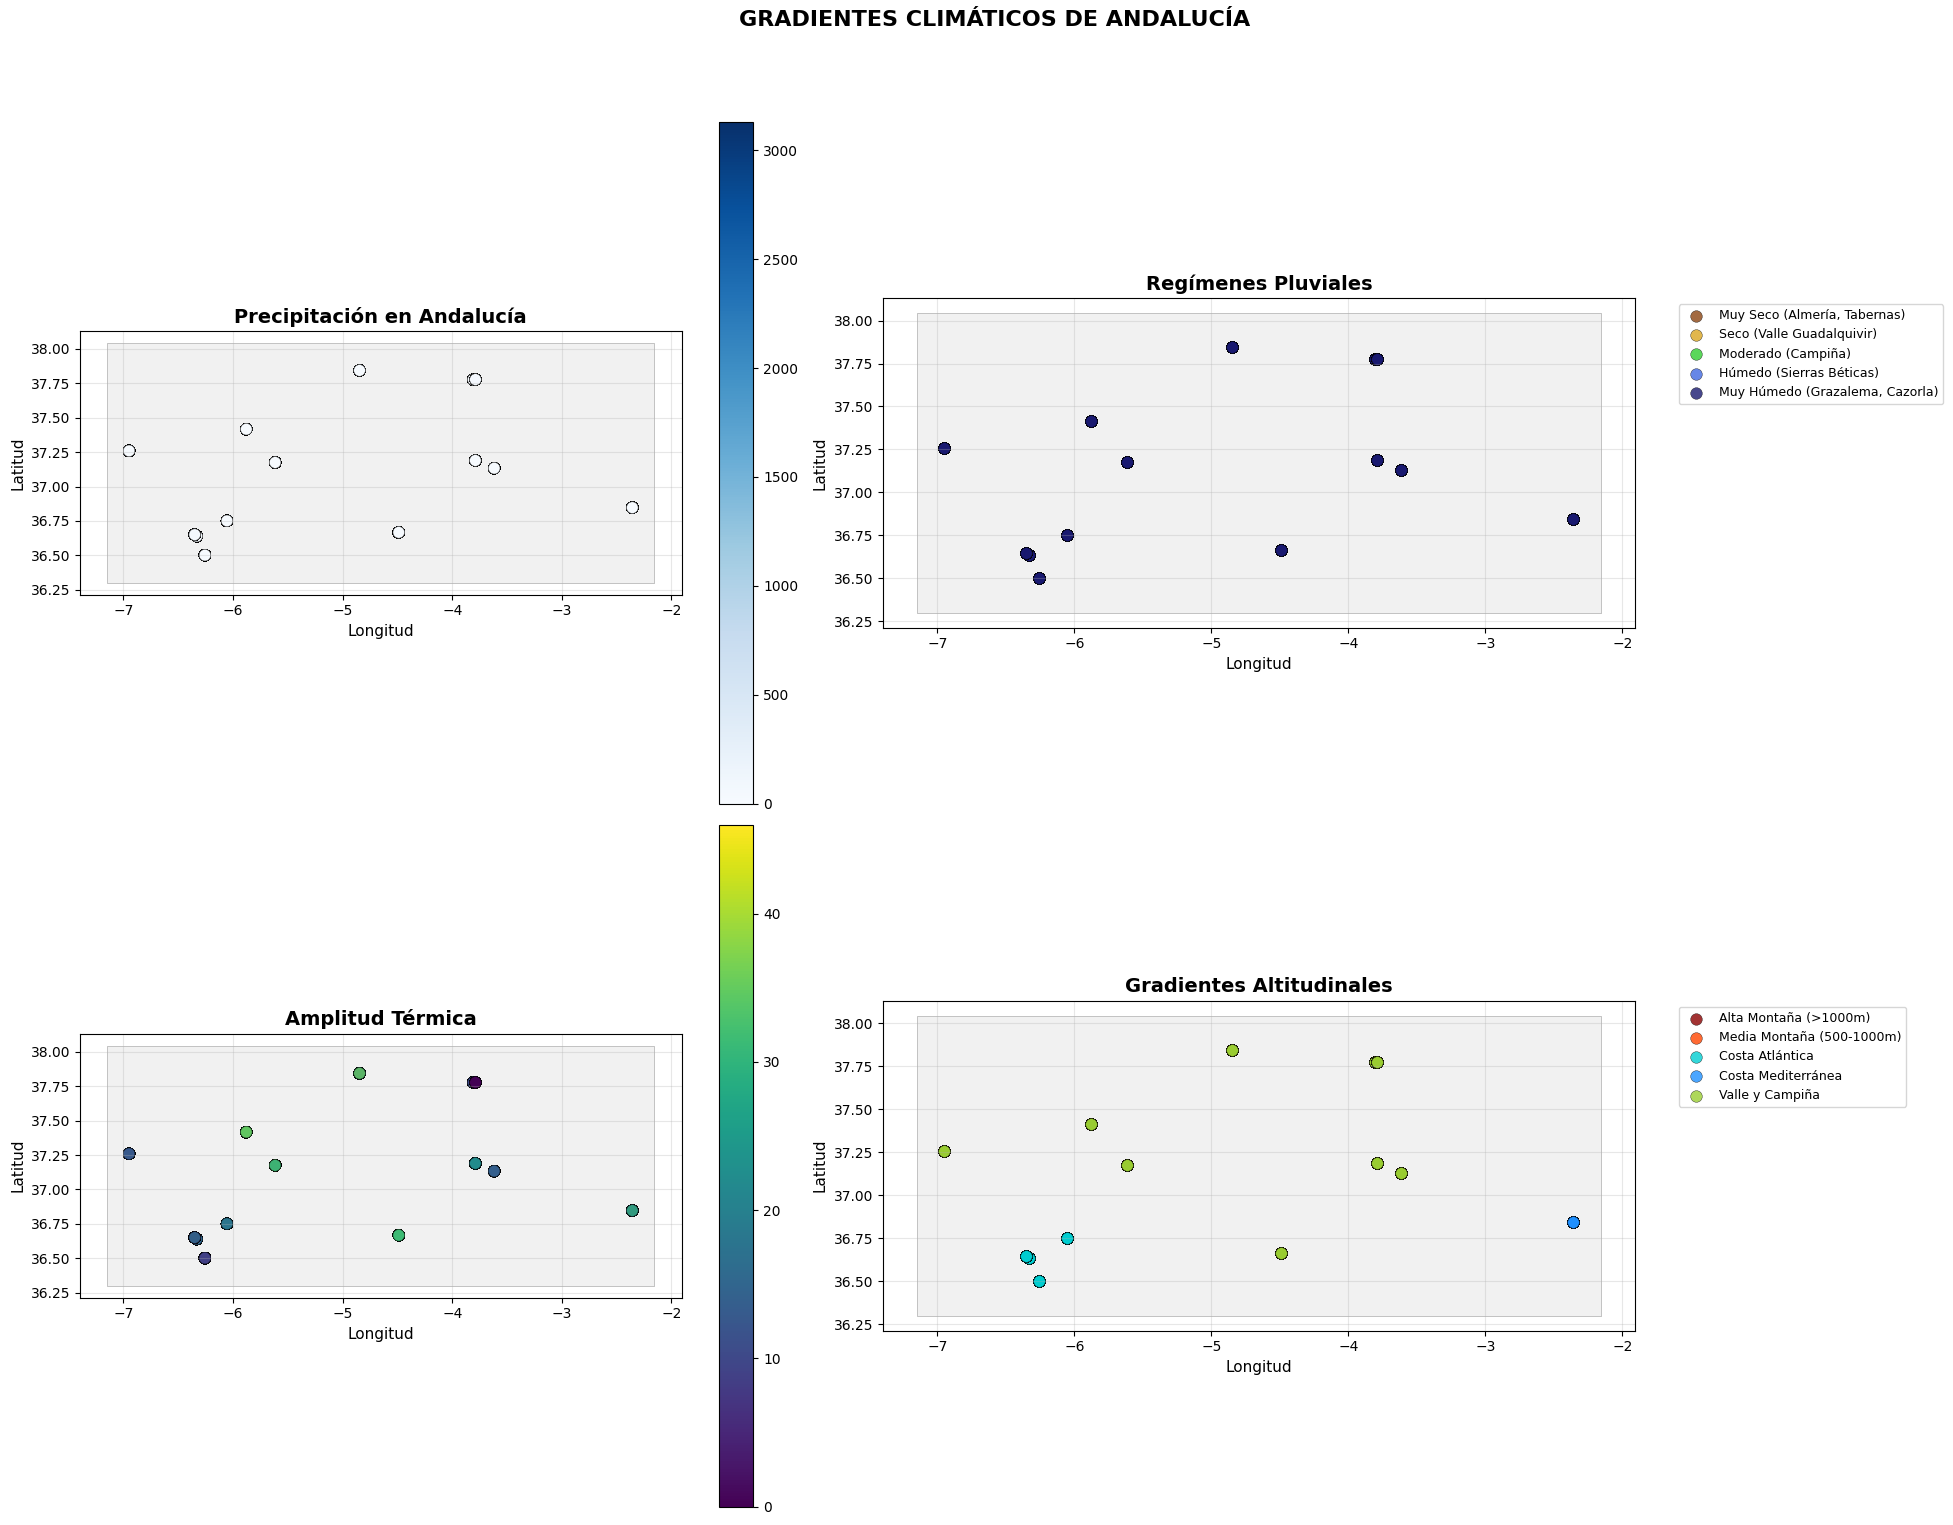


💧 DISTRIBUCIÓN DE REGÍMENES PLUVIALES:
• Muy Seco (Almería, Tabernas): 229,076 registros (81.9%)
• Muy Húmedo (Grazalema, Cazorla): 39,362 registros (14.1%)
• Húmedo (Sierras Béticas): 4,770 registros (1.7%)
• Moderado (Campiña): 4,558 registros (1.6%)
• Seco (Valle Guadalquivir): 1,796 registros (0.6%)

⛰️ DISTRIBUCIÓN POR GRADIENTES ALTITUDINALES:
• Valle y Campiña: 132,904 registros (47.5%)
• Costa Atlántica: 74,333 registros (26.6%)
• Alta Montaña (>1000m): 36,625 registros (13.1%)
• Costa Mediterránea: 20,662 registros (7.4%)
• Media Montaña (500-1000m): 15,038 registros (5.4%)

📊 CORRELACIONES GEOGRÁFICAS EN ANDALUCÍA:
Temperatura Máxima vs Latitud: 0.043
Temperatura Máxima vs Longitud: -0.030
Precipitación vs Latitud: 0.010
Precipitación vs Longitud: -0.027
Amplitud Térmica vs Latitud: 0.257

🏜️ ZONAS MÁS SECAS DE ANDALUCÍA:
• SP000006155: 0.00 mm - Muy Seco (Almería, Tabernas)
• SP000006155: 0.00 mm - Muy Seco (Almería, Tabernas)
• SP000006155: 0.00 mm - Muy Seco (Almería, Tab

In [9]:
# 2. MAPA DE GRADIENTES Y PRECIPITACIÓN EN ANDALUCÍA
print("\n💧 ANÁLISIS DE PRECIPITACIÓN Y GRADIENTES EN ANDALUCÍA")
print("="*60)

# Calcular amplitud térmica
if 'TMAX_C' in df_and_filtered.columns and 'TMIN_C' in df_and_filtered.columns:
    df_and_filtered['AMPLITUD_TERMICA'] = df_and_filtered['TMAX_C'] - df_and_filtered['TMIN_C']
else:
    # Usar las columnas originales si las Celsius no están disponibles
    df_and_filtered['AMPLITUD_TERMICA'] = df_and_filtered['TMAX'] - df_and_filtered['TMIN']

# Estadísticas de precipitación para Andalucía
prcp_stats_and = df_and_filtered['PRCP'].describe()
print("📊 ESTADÍSTICAS DE PRECIPITACIÓN EN ANDALUCÍA:")
print(f"Media: {prcp_stats_and['mean']:.2f} mm")
print(f"Rango: {prcp_stats_and['min']:.2f} - {prcp_stats_and['max']:.2f} mm")
print(f"Desviación estándar: {prcp_stats_and['std']:.2f} mm")

# Clasificar regímenes pluviométricos andaluces
def clasificar_regimen_pluvial_andaluz(prcp):
    if prcp < 0.5:
        return 'Muy Seco (Almería, Tabernas)'
    elif prcp < 2:
        return 'Seco (Valle Guadalquivir)'
    elif prcp < 5:
        return 'Moderado (Campiña)'
    elif prcp < 10:
        return 'Húmedo (Sierras Béticas)'
    else:
        return 'Muy Húmedo (Grazalema, Cazorla)'

df_and_filtered['REGIMEN_PLUVIAL'] = df_and_filtered['PRCP'].apply(clasificar_regimen_pluvial_andaluz)

# Clasificar por gradientes altitudinales (aproximado por latitud)
def clasificar_gradiente_altitudinal(row):
    lat = row['LATITUDE']
    lon = row['LONGITUDE']
    
    # Usar la columna de temperatura mínima disponible
    if 'TMIN_C' in df_and_filtered.columns:
        tmin = row['TMIN_C']
    else:
        tmin = (row['TMIN'] - 32) * 5/9  # Convertir de Fahrenheit a Celsius si es necesario
    
    # Aproximación basada en coordenadas y temperatura
    if tmin < 5:
        return 'Alta Montaña (>1000m)'
    elif lat > 37.5 and tmin < 10:
        return 'Media Montaña (500-1000m)'
    elif lon < -5 and lat < 37:
        return 'Costa Atlántica'
    elif lon > -3:
        return 'Costa Mediterránea'
    else:
        return 'Valle y Campiña'

df_and_filtered['GRADIENTE_ALT'] = df_and_filtered.apply(clasificar_gradiente_altitudinal, axis=1)

# Actualizar el geodataframe
gdf_andalucia_filtered = gpd.GeoDataFrame(
    df_and_filtered, 
    geometry=gpd.points_from_xy(df_and_filtered.LONGITUDE, df_and_filtered.LATITUDE),
    crs='EPSG:4326'
)

# Crear mapas de gradientes y precipitación
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Colores para regímenes pluviales
colores_pluvial = {
    'Muy Seco (Almería, Tabernas)': '#8B4513',
    'Seco (Valle Guadalquivir)': '#DAA520',
    'Moderado (Campiña)': '#32CD32',
    'Húmedo (Sierras Béticas)': '#4169E1',
    'Muy Húmedo (Grazalema, Cazorla)': '#191970'
}

# Colores para gradientes altitudinales
colores_altitud = {
    'Alta Montaña (>1000m)': '#8B0000',
    'Media Montaña (500-1000m)': '#FF4500',
    'Costa Atlántica': '#00CED1',
    'Costa Mediterránea': '#1E90FF',
    'Valle y Campiña': '#9ACD32'
}

# Mapa 1: Precipitación
mapa_andalucia.plot(ax=axes[0,0], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
gdf_andalucia_filtered.plot(ax=axes[0,0], column='PRCP', cmap='Blues', markersize=70, 
                           legend=True, alpha=0.8, edgecolors='black', linewidth=0.3)
axes[0,0].set_title('Precipitación en Andalucía', fontsize=14, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Mapa 2: Regímenes Pluviales
mapa_andalucia.plot(ax=axes[0,1], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
for regimen, color in colores_pluvial.items():
    subset = gdf_andalucia_filtered[gdf_andalucia_filtered['REGIMEN_PLUVIAL'] == regimen]
    if len(subset) > 0:
        subset.plot(ax=axes[0,1], color=color, markersize=70, alpha=0.8, 
                   label=regimen, edgecolors='black', linewidth=0.3)
axes[0,1].set_title('Regímenes Pluviales', fontsize=14, fontweight='bold')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0,1].grid(True, alpha=0.3)

# Mapa 3: Amplitud Térmica
mapa_andalucia.plot(ax=axes[1,0], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
gdf_andalucia_filtered.plot(ax=axes[1,0], column='AMPLITUD_TERMICA', cmap='viridis', 
                           markersize=70, legend=True, alpha=0.8, edgecolors='black', linewidth=0.3)
axes[1,0].set_title('Amplitud Térmica', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Mapa 4: Gradientes Altitudinales
mapa_andalucia.plot(ax=axes[1,1], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
for gradiente, color in colores_altitud.items():
    subset = gdf_andalucia_filtered[gdf_andalucia_filtered['GRADIENTE_ALT'] == gradiente]
    if len(subset) > 0:
        subset.plot(ax=axes[1,1], color=color, markersize=70, alpha=0.8, 
                   label=gradiente, edgecolors='black', linewidth=0.3)
axes[1,1].set_title('Gradientes Altitudinales', fontsize=14, fontweight='bold')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1,1].grid(True, alpha=0.3)

# Configurar ejes
for ax in axes.flat:
    ax.set_xlabel('Longitud', fontsize=11)
    ax.set_ylabel('Latitud', fontsize=11)

plt.suptitle('GRADIENTES CLIMÁTICOS DE ANDALUCÍA', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.88, right=0.82)
plt.show()

# Análisis estadístico por regímenes
print(f"\n💧 DISTRIBUCIÓN DE REGÍMENES PLUVIALES:")
regimen_counts = df_and_filtered['REGIMEN_PLUVIAL'].value_counts()
for regimen, count in regimen_counts.items():
    porcentaje = (count / len(df_and_filtered)) * 100
    print(f"• {regimen}: {count:,} registros ({porcentaje:.1f}%)")

print(f"\n⛰️ DISTRIBUCIÓN POR GRADIENTES ALTITUDINALES:")
gradiente_counts = df_and_filtered['GRADIENTE_ALT'].value_counts()
for gradiente, count in gradiente_counts.items():
    porcentaje = (count / len(df_and_filtered)) * 100
    print(f"• {gradiente}: {count:,} registros ({porcentaje:.1f}%)")

# Correlaciones geográficas específicas de Andalucía
print(f"\n📊 CORRELACIONES GEOGRÁFICAS EN ANDALUCÍA:")
# Usar las columnas disponibles
temp_max_col = 'TMAX_C' if 'TMAX_C' in df_and_filtered.columns else 'TMAX'
temp_min_col = 'TMIN_C' if 'TMIN_C' in df_and_filtered.columns else 'TMIN'

correlaciones_and = df_and_filtered[['LATITUDE', 'LONGITUDE', temp_max_col, temp_min_col, 'PRCP', 'AMPLITUD_TERMICA']].corr()
print(f"Temperatura Máxima vs Latitud: {correlaciones_and.loc[temp_max_col, 'LATITUDE']:.3f}")
print(f"Temperatura Máxima vs Longitud: {correlaciones_and.loc[temp_max_col, 'LONGITUDE']:.3f}")
print(f"Precipitación vs Latitud: {correlaciones_and.loc['PRCP', 'LATITUDE']:.3f}")
print(f"Precipitación vs Longitud: {correlaciones_and.loc['PRCP', 'LONGITUDE']:.3f}")
print(f"Amplitud Térmica vs Latitud: {correlaciones_and.loc['AMPLITUD_TERMICA', 'LATITUDE']:.3f}")

# Zonas características de Andalucía
print(f"\n🏜️ ZONAS MÁS SECAS DE ANDALUCÍA:")
zonas_secas_and = df_and_filtered.nsmallest(5, 'PRCP')[['STATION', 'PRCP', 'REGIMEN_PLUVIAL', 'LATITUDE', 'LONGITUDE']]
for idx, row in zonas_secas_and.iterrows():
    print(f"• {row['STATION']}: {row['PRCP']:.2f} mm - {row['REGIMEN_PLUVIAL']}")

print(f"\n🌊 ZONAS MÁS HÚMEDAS DE ANDALUCÍA:")
zonas_humedas_and = df_and_filtered.nlargest(5, 'PRCP')[['STATION', 'PRCP', 'REGIMEN_PLUVIAL', 'LATITUDE', 'LONGITUDE']]
for idx, row in zonas_humedas_and.iterrows():
    print(f"• {row['STATION']}: {row['PRCP']:.2f} mm - {row['REGIMEN_PLUVIAL']}")


🎯 IDENTIFICACIÓN DE ZONAS CLIMÁTICAS HOMOGÉNEAS


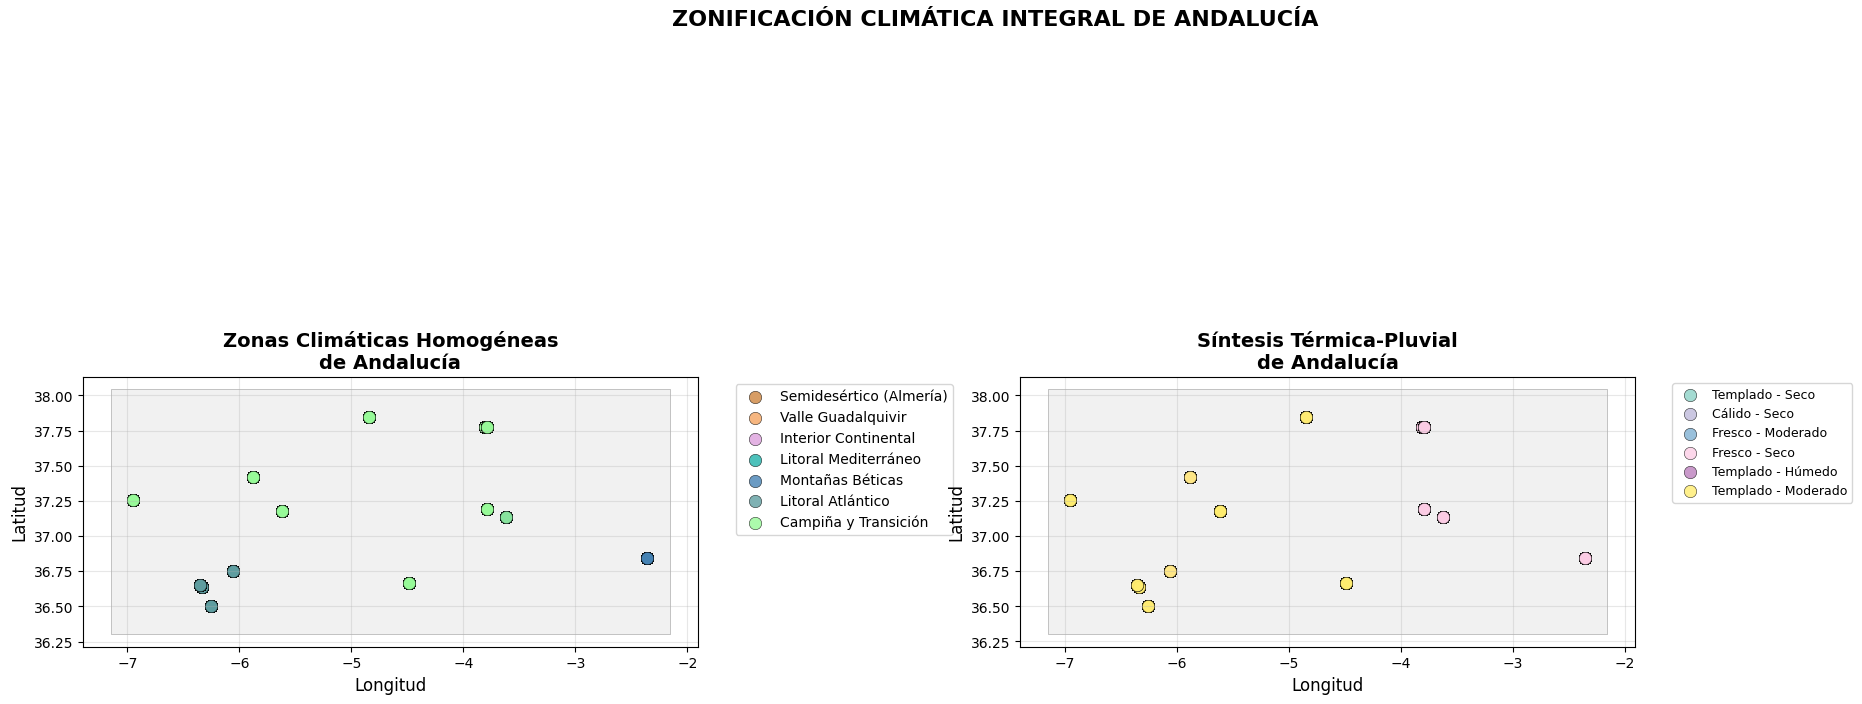


📊 ESTADÍSTICAS POR ZONA CLIMÁTICA ANDALUZA:
----------------------------------------------------------------------
                         TMax_Media  TMax_Std  TMin_Media  TMin_Std  \
ZONA_CLIMATICA_AND                                                    
Campiña y Transición          20.96      4.65       13.54      2.90   
Interior Continental          16.04      2.81        7.79      1.38   
Litoral Atlántico             21.66      4.46       13.29      4.50   
Litoral Mediterráneo          21.92      4.39       13.66      4.67   
Montañas Béticas              15.76      5.44        3.40      3.29   
Semidesértico (Almería)       34.25      2.91       18.15      4.50   
Valle Guadalquivir            23.23      4.36       12.35      4.19   

                         Prcp_Media  Prcp_Std  Amplitud_Media  Amplitud_Std  \
ZONA_CLIMATICA_AND                                                            
Campiña y Transición          87.33    123.31            7.42          3.31   
Interio

In [13]:
# 3. ANÁLISIS DE ZONAS HOMOGÉNEAS CLIMÁTICAS EN ANDALUCÍA
print("\n🎯 IDENTIFICACIÓN DE ZONAS CLIMÁTICAS HOMOGÉNEAS")
print("="*60)

# Crear clasificación integrada de zonas climáticas andaluzas
def clasificar_zona_climatica_andaluza(row):
    regimen = row['REGIMEN_PLUVIAL']
    gradiente = row['GRADIENTE_ALT']
    temp_max = row['TMAX_C'] if 'TMAX_C' in row.index else (row['TMAX'] - 32) * 5/9
    temp_min = row['TMIN_C'] if 'TMIN_C' in row.index else (row['TMIN'] - 32) * 5/9
    
    # Combinaciones específicas para Andalucía
    if 'Muy Seco' in regimen and temp_max > 30:
        return 'Semidesértico (Almería)'
    elif 'Seco' in regimen and 'Valle y Campiña' in gradiente:
        return 'Valle Guadalquivir'
    elif 'Alta Montaña' in gradiente or 'Media Montaña' in gradiente:
        return 'Montañas Béticas'
    elif 'Costa Mediterránea' in gradiente:
        return 'Litoral Mediterráneo'
    elif 'Costa Atlántica' in gradiente:
        return 'Litoral Atlántico'
    elif temp_max < 25 and temp_min < 10:
        return 'Interior Continental'
    else:
        return 'Campiña y Transición'

df_and_filtered['ZONA_CLIMATICA_AND'] = df_and_filtered.apply(clasificar_zona_climatica_andaluza, axis=1)

# Actualizar el geodataframe
gdf_andalucia_filtered = gpd.GeoDataFrame(
    df_and_filtered, 
    geometry=gpd.points_from_xy(df_and_filtered.LONGITUDE, df_and_filtered.LATITUDE),
    crs='EPSG:4326'
)

# Crear mapa final de zonas homogéneas
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Colores distintivos para zonas climáticas andaluzas
colores_zonas_and = {
    'Semidesértico (Almería)': '#CD853F',
    'Valle Guadalquivir': '#F4A460',
    'Interior Continental': '#DDA0DD',
    'Litoral Mediterráneo': '#20B2AA',
    'Montañas Béticas': '#4682B4',
    'Litoral Atlántico': '#5F9EA0',
    'Campiña y Transición': '#98FB98'
}

# Mapa 1: Zonas Climáticas Integradas
mapa_andalucia.plot(ax=axes[0], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
for zona, color in colores_zonas_and.items():
    subset = gdf_andalucia_filtered[gdf_andalucia_filtered['ZONA_CLIMATICA_AND'] == zona]
    if len(subset) > 0:
        subset.plot(ax=axes[0], color=color, markersize=80, alpha=0.8, 
                   label=zona, edgecolors='black', linewidth=0.4)

axes[0].set_title('Zonas Climáticas Homogéneas\nde Andalucía', fontsize=14, fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Longitud', fontsize=12)
axes[0].set_ylabel('Latitud', fontsize=12)

# Mapa 2: Síntesis Climática (Temperatura vs Precipitación)
mapa_andalucia.plot(ax=axes[1], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)

# Crear una clasificación de síntesis basada en temperatura y precipitación
temp_col = 'TMAX_C' if 'TMAX_C' in df_and_filtered.columns else 'TMAX'
prcp_col = 'PRCP'  # Usar la columna correcta

# Crear las categorías por separado y luego combinarlas como strings
temp_cats = pd.cut(df_and_filtered[temp_col], bins=3, labels=['Fresco', 'Templado', 'Cálido'])
prcp_cats = pd.cut(df_and_filtered[prcp_col], bins=3, labels=['Seco', 'Moderado', 'Húmedo'])

# Convertir a string y concatenar
df_and_filtered['TEMP_PRCP_CLASS'] = temp_cats.astype(str) + ' - ' + prcp_cats.astype(str)

# Mapear colores para la síntesis
unique_classes = df_and_filtered['TEMP_PRCP_CLASS'].unique()
unique_classes = [cls for cls in unique_classes if 'nan' not in cls]  # Filtrar valores NaN
sintesis_colors = plt.cm.Set3(np.linspace(0, 1, len(unique_classes)))
color_map = dict(zip(unique_classes, sintesis_colors))

for clase in unique_classes:
    subset = gdf_andalucia_filtered[df_and_filtered['TEMP_PRCP_CLASS'] == clase]
    if len(subset) > 0:
        subset.plot(ax=axes[1], color=color_map[clase], markersize=80, alpha=0.8, 
                   label=clase, edgecolors='black', linewidth=0.4)

axes[1].set_title('Síntesis Térmica-Pluvial\nde Andalucía', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('Longitud', fontsize=12)
axes[1].set_ylabel('Latitud', fontsize=12)

plt.suptitle('ZONIFICACIÓN CLIMÁTICA INTEGRAL DE ANDALUCÍA', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.88, right=0.82)
plt.show()

# Estadísticas finales por zonas
print(f"\n📊 ESTADÍSTICAS POR ZONA CLIMÁTICA ANDALUZA:")
print("-" * 70)

# Usar las columnas correctas según disponibilidad
temp_max_col = 'TMAX_C' if 'TMAX_C' in df_and_filtered.columns else 'TMAX'
temp_min_col = 'TMIN_C' if 'TMIN_C' in df_and_filtered.columns else 'TMIN'

zonas_and_stats = df_and_filtered.groupby('ZONA_CLIMATICA_AND').agg({
    temp_max_col: ['mean', 'std'],
    temp_min_col: ['mean', 'std'], 
    'PRCP': ['mean', 'std'],
    'AMPLITUD_TERMICA': ['mean', 'std'],
    'STATION': 'count'
}).round(2)

zonas_and_stats.columns = ['TMax_Media', 'TMax_Std', 'TMin_Media', 'TMin_Std',
                          'Prcp_Media', 'Prcp_Std', 'Amplitud_Media', 'Amplitud_Std', 'N_Estaciones']
print(zonas_and_stats)

print(f"\n🗺️ DISTRIBUCIÓN DE ZONAS CLIMÁTICAS EN ANDALUCÍA:")
zona_and_counts = df_and_filtered['ZONA_CLIMATICA_AND'].value_counts()
for zona, count in zona_and_counts.items():
    porcentaje = (count / len(df_and_filtered)) * 100
    print(f"• {zona}: {count:,} registros ({porcentaje:.1f}%)")

# Resumen final de características andaluzas
print(f"\n🌟 RESUMEN CLIMÁTICO DE ANDALUCÍA:")
print("-" * 50)
print(f"📍 Estaciones analizadas: {len(df_and_filtered):,}")
print(f"🌡️ Rango térmico: {df_and_filtered[temp_min_col].min():.1f}°C - {df_and_filtered[temp_max_col].max():.1f}°C")
print(f"💧 Rango pluvial: {df_and_filtered['PRCP'].min():.1f} - {df_and_filtered['PRCP'].max():.1f} mm")
print(f"🗺️ Zonas climáticas identificadas: {len(zona_and_counts)}")
print(f"⛰️ Gradientes altitudinales: {len(df_and_filtered['GRADIENTE_ALT'].unique())}")

# Identificar zonas más representativas
zona_principal = zona_and_counts.index[0]
print(f"\n🎯 Zona climática predominante: {zona_principal}")
print(f"   Representa el {(zona_and_counts.iloc[0]/len(df_and_filtered)*100):.1f}% de los registros")

🧪 Verificando que las visualizaciones se muestren correctamente en el notebook


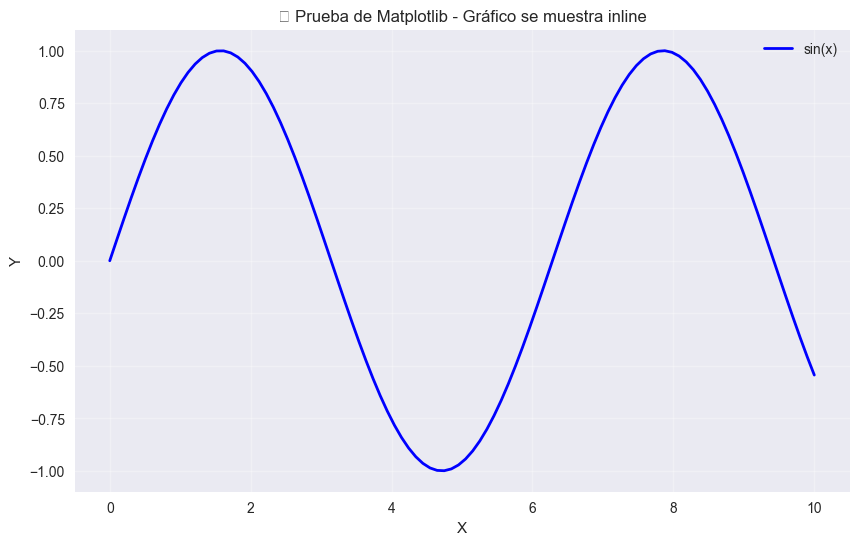

✅ Configuración verificada: Los gráficos se muestran inline en el notebook
📈 Plotly: Configurado con pio.renderers.default = 'notebook'
🖼️ Matplotlib: Configurado con %matplotlib inline


In [15]:
# Prueba de visualización inline
print("🧪 Verificando que las visualizaciones se muestren correctamente en el notebook")

# Crear un gráfico simple de prueba con matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='sin(x)')
plt.title('📊 Prueba de Matplotlib - Gráfico se muestra inline')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Crear un gráfico de prueba con Plotly
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='sin(x)'))
fig.update_layout(
    title='📈 Prueba de Plotly - Gráfico se muestra inline',
    xaxis_title='X',
    yaxis_title='Y'
)
fig.show()

print("✅ Configuración verificada: Los gráficos se muestran inline en el notebook")
print("📈 Plotly: Configurado con pio.renderers.default = 'notebook'")
print("🖼️ Matplotlib: Configurado con %matplotlib inline")

In [10]:
# Filtrar estaciones dentro de los límites geográficos de Andalucía
# Usar estaciones_info que ya está definido y filtrar por las coordenadas de Andalucía
stations_andalucia = estaciones_info[
    (estaciones_info['LATITUDE'] >= 36.0) &
    (estaciones_info['LATITUDE'] <= 38.8) &
    (estaciones_info['LONGITUDE'] >= -7.5) &
    (estaciones_info['LONGITUDE'] <= -1.6)
]

# Calcular temperatura media para el color
stations_andalucia = stations_andalucia.copy()
stations_andalucia['TAVG_C'] = (stations_andalucia['TMAX'] + stations_andalucia['TMIN']) / 2
stations_andalucia['PRCP_MM'] = stations_andalucia['PRCP']

fig = px.scatter_mapbox(
    stations_andalucia,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="TAVG_C",
    size="PRCP_MM",
    hover_name="NAME",
    hover_data={
        "ELEVATION": ":,",
        "TAVG_C": ":.1f",
        "PRCP_MM": ":.1f"
    },
    color_continuous_scale='RdYlBu_r',
    title='Mapa Profesional: Estaciones Meteorológicas de Andalucía por Temperatura y Precipitación',
    mapbox_style='open-street-map',
    height=650,
    zoom=6.5,
    center={"lat": 37.5, "lon": -4.5}
)

fig.update_layout(
    title_font_size=18,
    coloraxis_colorbar=dict(title="Temperatura Media (°C)"),
    legend=dict(title="Precipitación Media (mm)")
)

fig.show()